In [63]:
import sys
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import sqlite3
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [64]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline

In [65]:
conn = sqlite3.connect('BostonSeattle.db')
df_listings = pd.read_sql('SELECT * FROM cleanedListings', conn)
df_listings.head()

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,city,zipcode,market,smart_location,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,Dataset,price_per_accommodate,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,Dryer,Elevator in Building,Essentials,Family/Kid Friendly,Fire Extinguisher,First Aid Kit,Free Parking on Premises,Free Parking on Street,Gym,Hair Dryer,Hangers,Heating,Hot Tub,Indoor Fireplace,Internet,Iron,Kitchen,Laptop Friendly Workspace,Lock on Bedroom Door,Other pet(s),Paid Parking Off Premises,Pets Allowed,Pets live on this property,Pool,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
0,12147973,https://www.airbnb.com/rooms/12147973,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...","Roslindale is quiet, convenient and friendly. ...",None,"The bus stop is 2 blocks away, and frequent. B...",https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,None,NaN,NaN,0.0,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1.0,"['email', 'phone', 'facebook', 'reviews']",1.0,0.0,"Birch Street, Boston, MA 02131, United States",Roslindale,Boston,02131,Boston,"Boston, MA",42.282619,-71.133068,1,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"TV,Wireless Internet,Kitchen,Free Parking on P...",250.0,NaN,NaN,NaN,35.0,1,0.0,2,1125,2 weeks ago,0,0,0,0,0,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,moderate,0,0,1,NaN,Boston,62.50,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,0
1,3075044,https://www.airbnb.com/rooms/3075044,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,1.0,1.00,0.0,https://a2.muscache.com/im/users/2572247/profi.

In [66]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7403 entries, 0 to 7402
Columns: 124 entries, id to translation missing: en.hosting_amenity_50
dtypes: float64(26), int64(61), object(37)
memory usage: 7.0+ MB


### Drop Columns that are Irrelavent to Price Prediction:

In [67]:
# Check categorical columns

cat_cols=df_listings.select_dtypes(exclude=['int64', 'float64']).columns
cat_cols

Index(['listing_url', 'name', 'summary', 'space', 'description',
       'neighborhood_overview', 'notes', 'transit', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'street', 'neighbourhood', 'city', 'zipcode',
       'market', 'smart_location', 'property_type', 'room_type', 'bed_type',
       'amenities', 'calendar_updated', 'first_review', 'last_review',
       'cancellation_policy', 'Dataset'],
      dtype='object')

In [68]:
df_listings[cat_cols].head()

,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,street,neighbourhood,city,zipcode,market,smart_location,property_type,room_type,bed_type,amenities,calendar_updated,first_review,last_review,cancellation_policy,Dataset
0,https://www.airbnb.com/rooms/12147973,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...","Roslindale is quiet, convenient and friendly. ...",None,"The bus stop is 2 blocks away, and frequent. B...",https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,None,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,"['email', 'phone', 'facebook', 'reviews']","Birch Street, Boston, MA 02131, United States",Roslindale,Boston,02131,Boston,"Boston, MA",House,Entire home/apt,Real Bed,"TV,Wireless Internet,Kitchen,Free Parking on P...",2 weeks ago,None,None,moderate,Boston
1,https://www.airbnb.com/rooms/3075044,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,"['email', 'phone', 'facebook', 'linkedin', 'am...","Pinehurst Street, Boston, MA 02131, United States",Roslindale,Boston,02131,Boston,"Boston, MA",Apartment,Private room,Real Bed,"TV,Internet,Wireless Internet,Air Conditioning...",a week ago,2014-06-01,2016-08-13,moderate,Boston
2,https://www.airbnb.com/rooms/6976,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",The LOCATION: Roslindale is a safe and diverse...,I am in a scenic part of Boston with a couple ...,"PUBLIC TRANSPORTATION: From the house, quick p...",https://a2.muscache.com/im/pictures/6ae8335d-9...,https://a2.muscache.com/im/pictures/6ae8335d-9...,https://a2.muscache.com/im/pictures/6ae8335d-9...,https://a2.muscache.com/im/pictures/6ae8335d-9...,https://www.airbnb.com/users/show/16701,Phil,2009-05-11,"Boston, Massachusetts, United States","I am a middle-aged, single male with a wide ra...",within a few hours,https://a2.muscache.com/im/users/16701/profile...,https://a2.muscache.com/im/users/16701/profile...,Roslindale,"['email', 'phone', 'reviews', 'jumio']","Ardale St., Boston, MA 02131, United States",Roslindale,Boston,02131,Boston,"Boston, MA",Apartment,Private room,Real Bed,"TV,Cable TV,Wireless Internet,Air Conditioning...",5 days ago,2009-07-19,2016-08-05,moderate,Boston
3,https://www.airbnb.com/rooms/1436513,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,Roslindale i

In [69]:
# Drop the first 17 columns

df_listings.drop(columns=cat_cols[:17], inplace=True)
df_listings.head()

,id,host_id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,city,zipcode,market,smart_location,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,Dataset,price_per_accommodate,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,Dryer,Elevator in Building,Essentials,Family/Kid Friendly,Fire Extinguisher,First Aid Kit,Free Parking on Premises,Free Parking on Street,Gym,Hair Dryer,Hangers,Heating,Hot Tub,Indoor Fireplace,Internet,Iron,Kitchen,Laptop Friendly Workspace,Lock on Bedroom Door,Other pet(s),Paid Parking Off Premises,Pets Allowed,Pets live on this property,Pool,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
0,12147973,31303940,None,NaN,NaN,0.0,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1.0,"['email', 'phone', 'facebook', 'reviews']",1.0,0.0,"Birch Street, Boston, MA 02131, United States",Roslindale,Boston,02131,Boston,"Boston, MA",42.282619,-71.133068,1,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"TV,Wireless Internet,Kitchen,Free Parking on P...",250.0,NaN,NaN,NaN,35.0,1,0.0,2,1125,2 weeks ago,0,0,0,0,0,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,moderate,0,0,1,NaN,Boston,62.50,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,0
1,3075044,2572247,within an hour,1.0,1.00,0.0,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1.0,"['email', 'phone', 'facebook', 'linkedin', 'am...",1.0,1.0,"Pinehurst Street, Boston, MA 02131, United States",Roslindale,Boston,02131,Boston,"Boston, MA",42.286241,-71.134374,1,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Air Conditioning...",65.0,400.0,NaN,95.0,10.0,0,0.0,2,15,a week ago,26,54,84,359,36,2014-06-01,2016-08-13,94.0,10.0,9.0,10.0,10.0,9.0,9.0,1,moderate,0,0,1,1.30,Boston,32.50,0,1,0,0,0,1,0,1,0,1,0,1,1,1,0,0,0,0,1,1,1,0,0,1,1,1,0,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,0,0
2,6976,16701,within a few hours,1.0,0.88,1.0,https://a2.muscache.com/im/users/16701/profile...,https://a2.muscache.com/im/users/16701/profile...,Roslindale,1.0,"['email', 'phone', 'reviews', 'jumio']",1.0,1.0,"Ardale St., Boston, MA 02131, United States",Roslindale,Boston,02131,Boston,"Boston, MA",42.292438,-71.135765,1,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"TV,Cable TV,Wireless Internet,Air Conditioning...",65.0,395.0,1350.0,NaN,NaN,1,20.0,3,45,5 days ago,19,46,61,319,41,2009-07-19,2016-08-05,98.0,10.0,9.0,10.0,10.0,9.0,10.0,0,moderate,1,0,1,0.47,Boston,32.50,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,1
3,1436513,6031442,within a few hours,1.0,0.50,0.0,https://a2.muscache.com/im/pictures/5d430cde-7...,https://a2.muscache.com/im/pictures/5d430cde-7...,None,1.0,"['email', 'phone', 'reviews']",1.0,0.0,"Boston, MA, United States",Roslindale,Boston,None,Boston,"Boston, MA",42.281106,-71.121021,0,House,Private room,4,1.0,1.0,2.0,Real Bed,"

In [70]:
# Drop the 'url' columns

df_listings.drop(columns=df_listings.columns[df_listings.columns.str.contains('url')], inplace=True)
df_listings.head()

,id,host_id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,city,zipcode,market,smart_location,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,Dataset,price_per_accommodate,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,Dryer,Elevator in Building,Essentials,Family/Kid Friendly,Fire Extinguisher,First Aid Kit,Free Parking on Premises,Free Parking on Street,Gym,Hair Dryer,Hangers,Heating,Hot Tub,Indoor Fireplace,Internet,Iron,Kitchen,Laptop Friendly Workspace,Lock on Bedroom Door,Other pet(s),Paid Parking Off Premises,Pets Allowed,Pets live on this property,Pool,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
0,12147973,31303940,None,NaN,NaN,0.0,Roslindale,1.0,"['email', 'phone', 'facebook', 'reviews']",1.0,0.0,"Birch Street, Boston, MA 02131, United States",Roslindale,Boston,02131,Boston,"Boston, MA",42.282619,-71.133068,1,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"TV,Wireless Internet,Kitchen,Free Parking on P...",250.0,NaN,NaN,NaN,35.0,1,0.0,2,1125,2 weeks ago,0,0,0,0,0,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,moderate,0,0,1,NaN,Boston,62.50,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,0
1,3075044,2572247,within an hour,1.0,1.00,0.0,Roslindale,1.0,"['email', 'phone', 'facebook', 'linkedin', 'am...",1.0,1.0,"Pinehurst Street, Boston, MA 02131, United States",Roslindale,Boston,02131,Boston,"Boston, MA",42.286241,-71.134374,1,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Air Conditioning...",65.0,400.0,NaN,95.0,10.0,0,0.0,2,15,a week ago,26,54,84,359,36,2014-06-01,2016-08-13,94.0,10.0,9.0,10.0,10.0,9.0,9.0,1,moderate,0,0,1,1.30,Boston,32.50,0,1,0,0,0,1,0,1,0,1,0,1,1,1,0,0,0,0,1,1,1,0,0,1,1,1,0,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,0,0
2,6976,16701,within a few hours,1.0,0.88,1.0,Roslindale,1.0,"['email', 'phone', 'reviews', 'jumio']",1.0,1.0,"Ardale St., Boston, MA 02131, United States",Roslindale,Boston,02131,Boston,"Boston, MA",42.292438,-71.135765,1,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"TV,Cable TV,Wireless Internet,Air Conditioning...",65.0,395.0,1350.0,NaN,NaN,1,20.0,3,45,5 days ago,19,46,61,319,41,2009-07-19,2016-08-05,98.0,10.0,9.0,10.0,10.0,9.0,10.0,0,moderate,1,0,1,0.47,Boston,32.50,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,1
3,1436513,6031442,within a few hours,1.0,0.50,0.0,None,1.0,"['email', 'phone', 'reviews']",1.0,0.0,"Boston, MA, United States",Roslindale,Boston,None,Boston,"Boston, MA",42.281106,-71.121021,0,House,Private room,4,1.0,1.0,2.0,Real Bed,"TV,Internet,Wireless Internet,Air Conditioning...",75.0,NaN,NaN,100.0,50.0,2,25.0,1,1125,a week ago,6,16,26,98,1,2016-08-28,2016-08-28,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,moderate,0,0,1,1.00,Boston,18.75,0,1,1,0,0,1,0,0,0,1,0,1,0,1,1,1,0,1,1,1,1,0,1,1,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,0,0
4,7651065,15396970,within an hour,1.0,1.00,1.0,Roslindale,1.0,"['email', 'phone', 'reviews', 'kba']",1.0,1.0,"Durnell Avenue, Boston, MA 021

#### Check the number of unique values in each of the categorical columns:

In [71]:
for col in df_listings:
    num_unique_vals=len(df_listings[col].unique())
    if (col in cat_cols) & (num_unique_vals<100):
        print(col, num_unique_vals)

host_response_time 5
city 46
zipcode 72
market 6
smart_location 46
property_type 20
room_type 3
bed_type 5
calendar_updated 38
cancellation_policy 4
Dataset 2


In [72]:
for col in df_listings:
    num_unique_vals=len(df_listings[col].unique())
    if (col in cat_cols) & (num_unique_vals>100):
        print(col, num_unique_vals)

host_neighbourhood 152
host_verifications 136
street 2681
neighbourhood 111
amenities 6310
first_review 1424
last_review 582


In [73]:
df_listings['smart_location'].unique()

array(['Boston, MA', 'Roslindale, MA', 'Roslindale, Boston, MA',
       'Jamaica Plain, MA', 'Brookline, MA', 'Jamaica Plain, Boston, MA',
       'Jamaica Plain (Boston), MA', 'Roxbury Crossing, MA',
       'Jamaica Plain , MA', 'Jamaica Plain, MA, MA',
       'Boston (Jamaica Plain), MA', 'Jamaica plain , MA',
       'ROXBURY CROSSING, MA', 'Mission Hill, Boston, MA', 'boston, MA',
       '波士顿, MA', 'Boston, Massachusetts, US, MA',
       'South End, Boston, MA', 'Cambridge, MA', 'East Boston, MA',
       'east Boston , MA', 'Charlestown, MA', 'Boston (Charlestown), MA',
       'Somerville, MA', 'Watertown, MA', 'Brighton, MA', 'Brighton , MA',
       'Boston , MA', 'MA', 'West Roxbury, MA', 'Newton, MA',
       'Hyde Park, MA', 'Mattapan, MA', 'Milton, MA', 'Dorchester, MA',
       'dorchester, boston , MA', 'South Boston, MA', 'Allston, MA',
       'ALLSTON, MA', 'Seattle, WA', 'Ballard, Seattle, WA',
       'West Seattle, WA', 'Seattle , WA', '西雅图, WA',
       'Phinney Ridge Seattl

In [74]:
# Check the values in the location columns

df_listings[['neighbourhood', 'city', 'zipcode',
       'market', 'smart_location', 'Dataset']].drop_duplicates().sort_values(['Dataset', 'city', 'neighbourhood', 'zipcode'])

,neighbourhood,city,zipcode,market,smart_location,Dataset
3376,Allston,ALLSTON,02134,Boston,"ALLSTON, MA",Boston
3307,Allston,Allston,02134,Boston,"Allston, MA",Boston
3364,Allston,Boston,02114,Boston,"Boston, MA",Boston
3293,Allston,Boston,02134,Boston,"Boston, MA",Boston
3357,Allston,Boston,02134,None,"Boston, MA",Boston
3391,Allston,Boston,02134-1704,Boston,"Boston, MA",Boston
3313,Allston,Boston,02135,Boston,"Boston, MA",Boston
3471,Allston,Boston,02163,Boston,"Boston, MA",Boston
3322,Allston,Boston,02215,Boston,"Boston, MA",Boston
3477,Allston,Boston,None,Boston,"Boston, MA",Boston


In [75]:
#df_listings.zipcode.replace({'99\n98122':'98122', '02108 02111':'02108', '02134-1704':'02134'}, inplace=True)
#df_listings.zipcode.value_counts()

In [76]:
# Drop more columns

df_listings.drop(columns=['city', 'zipcode',
       'market', 'smart_location', 'calendar_updated'], inplace=True)

In [77]:
# Drop more columns

df_listings.drop(columns=['id', 'host_id', 'host_neighbourhood','host_verifications','street','amenities', 'first_review', 'last_review'], inplace=True)

### Fill NaN values:

In [78]:
# Fill NaNs in numeric columns with columns medians

for col in df_listings.select_dtypes(include=['int64', 'float64']).columns:
    if len(df_listings[df_listings[col].isna()])>0:
        print(col, len(df_listings[df_listings[col].isna()]))
        df_listings[[col]]=df_listings[[col]].apply(lambda col: col.fillna(col.median()))
        print(col, len(df_listings[df_listings[col].isna()]))

host_response_rate 994
host_response_rate 0
host_acceptance_rate 1244
host_acceptance_rate 0
host_is_superhost 2
host_is_superhost 0
host_listings_count 2
host_listings_count 0
host_has_profile_pic 2
host_has_profile_pic 0
host_identity_verified 2
host_identity_verified 0
bathrooms 30
bathrooms 0
bedrooms 16
bedrooms 0
beds 10
beds 0
weekly_price 4502
weekly_price 0
monthly_price 4998
monthly_price 0
security_deposit 4195
security_deposit 0
cleaning_fee 2137
cleaning_fee 0
review_scores_rating 1460
review_scores_rating 0
review_scores_accuracy 1481
review_scores_accuracy 0
review_scores_cleanliness 1471
review_scores_cleanliness 0
review_scores_checkin 1478
review_scores_checkin 0
review_scores_communication 1469
review_scores_communication 0
review_scores_location 1477
review_scores_location 0
review_scores_value 1477
review_scores_value 0
reviews_per_month 1383
reviews_per_month 0


In [79]:
# Fill NaNs in numeric columns with columns modes

for col in df_listings.select_dtypes(exclude=['int64', 'float64']).columns:
    if len(df_listings[df_listings[col].isna()])>0:
        print(col, len(df_listings[df_listings[col].isna()]))
        df_listings[[col]]=df_listings[[col]].apply(lambda col: col.fillna(col.mode()[0]))
        print(col, len(df_listings[df_listings[col].isna()]))

host_response_time 994
host_response_time 0
property_type 4
property_type 0


In [80]:
df_listings.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,Dataset,price_per_accommodate,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,Dryer,Elevator in Building,Essentials,Family/Kid Friendly,Fire Extinguisher,First Aid Kit,Free Parking on Premises,Free Parking on Street,Gym,Hair Dryer,Hangers,Heating,Hot Tub,Indoor Fireplace,Internet,Iron,Kitchen,Laptop Friendly Workspace,Lock on Bedroom Door,Other pet(s),Paid Parking Off Premises,Pets Allowed,Pets live on this property,Pool,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
0,within an hour,1.0,1.00,0.0,1.0,1.0,0.0,Roslindale,42.282619,-71.133068,1,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,250.0,660.0,2400.0,250.0,35.0,1,0.0,2,1125,0,0,0,0,0,96.0,10.0,10.0,10.0,10.0,10.0,9.0,0,moderate,0,0,1,1.37,Boston,62.50,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,0
1,within an hour,1.0,1.00,0.0,1.0,1.0,1.0,Roslindale,42.286241,-71.134374,1,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,65.0,400.0,2400.0,95.0,10.0,0,0.0,2,15,26,54,84,359,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0,1,moderate,0,0,1,1.30,Boston,32.50,0,1,0,0,0,1,0,1,0,1,0,1,1,1,0,0,0,0,1,1,1,0,0,1,1,1,0,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,0,0
2,within a few hours,1.0,0.88,1.0,1.0,1.0,1.0,Roslindale,42.292438,-71.135765,1,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,65.0,395.0,1350.0,250.0,50.0,1,20.0,3,45,19,46,61,319,41,98.0,10.0,9.0,10.0,10.0,9.0,10.0,0,moderate,1,0,1,0.47,Boston,32.50,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,1
3,within a few hours,1.0,0.50,0.0,1.0,1.0,0.0,Roslindale,42.281106,-71.121021,0,House,Private room,4,1.0,1.0,2.0,Real Bed,75.0,660.0,2400.0,100.0,50.0,2,25.0,1,1125,6,16,26,98,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,moderate,0,0,1,1.00,Boston,18.75,0,1,1,0,0,1,0,0,0,1,0,1,0,1,1,1,0,1,1,1,1,0,1,1,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,0,0
4,within an hour,1.0,1.00,1.0,1.0,1.0,1.0,Roslindale,42.284512,-71.136258,1,House,Private room,2,1.5,1.0,2.0,Real Bed,79.0,660.0,2400.0,250.0,15.0,1,0.0,2,31,13,34,59,334,29,99.0,10.0,10.0,10.0,10.0,9.0,10.0,0,flexible,0,0,1,2.25,Boston,39.50,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0


In [81]:
df_listings=pd.get_dummies(df_listings)
df_listings.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,price_per_accommodate,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,Dryer,Elevator in Building,Essentials,Family/Kid Friendly,Fire Extinguisher,First Aid Kit,Free Parking on Premises,Free Parking on Street,Gym,Hair Dryer,Hangers,Heating,Hot Tub,Indoor Fireplace,Internet,Iron,Kitchen,Laptop Friendly Workspace,Lock on Bedroom Door,Other pet(s),Paid Parking Off Premises,Pets Allowed,Pets live on this property,Pool,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,neighbourhood_Adams,neighbourhood_Alki,neighbourhood_Allston,neighbourhood_Arbor Heights,neighbourhood_Atlantic,neighbourhood_Back Bay,neighbourhood_Bay Village,neighbourhood_Beacon Hill,neighbourhood_Belltown,neighbourhood_Bitter Lake,neighbourhood_Briarcliff,neighbourhood_Brighton,neighbourhood_Broadview,neighbourhood_Broadway,neighbourhood_Bryant,neighbourhood_Cedar Park,neighbourhood_Central Business District,neighbourhood_Charlestown,neighbourhood_Chinatown,neighbourhood_Columbia City,neighbourhood_Crown Hill,neighbourhood_Dorchester,neighbourhood_Downtown,neighbourhood_Dunlap,neighbourhood_East Boston,neighbourhood_East Queen Anne,neighbourhood_Eastlake,neighbourhood_Fairmount Park,neighbourhood_Fauntleroy,neighbourhood_Fenway,neighbourhood_First Hill,neighbourhood_Fremont,neighbourhood_Gatewood,neighbourhood_Genesee,neighbourhood_Georgetown,neighbourhood_Green Lake,neighbourhood_Greenwood,neighbourhood_Haller Lake,neighbourhood_Harrison/Denny-Blaine,neighbourhood_High Point,neighbourhood_Highland Park,neighbourhood_Holly Park,neighbourhood_Hyde Park,neighbourhood_Industrial District,neighbourhood_Interbay,neighbourhood_International District,neighbourhood_Jamaica Plain,neighbourhood_Laurelhurst,neighbourhood_Lawton Park,neighbourhood_Leather District,neighbourhood_Leschi,neighbourhood_Longwood Medical Area,neighbourhood_Lower Queen Anne,neighbourhood_Loyal Heights,neighbourhood_Madison Park,neighbourhood_Madrona,neighbourhood_Mann,neighbourhood_Maple Leaf,neighbourhood_Mattapan,neighbourhood_Matthews Beach,neighbourhood_Meadowbrook,neighbourhood_Mid-Beacon Hill,neighbourhood_Minor,neighbourhood_Mission Hill,neighbourhood_Montlake,neighbourhood_Mount Baker,neighbourhood_North Admiral,neighbourhood_North Beach/Blue Ridge,neighbourhood_North Beacon Hill,neighbourhood_North College Park,neighbourhood_North Delridge,neighbourhood_North End,neighbourhood_North Queen Anne,neighbourhood_Olympic Hills,neighbourhood_Phinney Ridge,neighbourhood_Pike-Market,neighbourhood_Pinehurst,neighbourhood_Pioneer Square,neighbourhood_Portage Bay,neighbourhood_Rainier Beach,neighbourhood_Ravenna,neighbourhood_Riverview,neighbourhood_Roosevelt,neighbourhood_Roslindale,neighbourhood_Roxbury,neighbourhood_Roxhill,neighbourhood_Seaview,neighbourhood_Seward Park,neighbourhood_South Beacon Hill,neighbourhood_South Boston,neighbourhood_South Boston Waterfront,neighbourhood_South Delridge,neighbourhood_South End,neighbourhood_Sou

In [82]:
y=df_listings[['price']]
X=df_listings.drop(columns=['price', 'price_per_accommodate'])

In [83]:
X.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,accommodates,bathrooms,bedrooms,beds,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,Dryer,Elevator in Building,Essentials,Family/Kid Friendly,Fire Extinguisher,First Aid Kit,Free Parking on Premises,Free Parking on Street,Gym,Hair Dryer,Hangers,Heating,Hot Tub,Indoor Fireplace,Internet,Iron,Kitchen,Laptop Friendly Workspace,Lock on Bedroom Door,Other pet(s),Paid Parking Off Premises,Pets Allowed,Pets live on this property,Pool,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,neighbourhood_Adams,neighbourhood_Alki,neighbourhood_Allston,neighbourhood_Arbor Heights,neighbourhood_Atlantic,neighbourhood_Back Bay,neighbourhood_Bay Village,neighbourhood_Beacon Hill,neighbourhood_Belltown,neighbourhood_Bitter Lake,neighbourhood_Briarcliff,neighbourhood_Brighton,neighbourhood_Broadview,neighbourhood_Broadway,neighbourhood_Bryant,neighbourhood_Cedar Park,neighbourhood_Central Business District,neighbourhood_Charlestown,neighbourhood_Chinatown,neighbourhood_Columbia City,neighbourhood_Crown Hill,neighbourhood_Dorchester,neighbourhood_Downtown,neighbourhood_Dunlap,neighbourhood_East Boston,neighbourhood_East Queen Anne,neighbourhood_Eastlake,neighbourhood_Fairmount Park,neighbourhood_Fauntleroy,neighbourhood_Fenway,neighbourhood_First Hill,neighbourhood_Fremont,neighbourhood_Gatewood,neighbourhood_Genesee,neighbourhood_Georgetown,neighbourhood_Green Lake,neighbourhood_Greenwood,neighbourhood_Haller Lake,neighbourhood_Harrison/Denny-Blaine,neighbourhood_High Point,neighbourhood_Highland Park,neighbourhood_Holly Park,neighbourhood_Hyde Park,neighbourhood_Industrial District,neighbourhood_Interbay,neighbourhood_International District,neighbourhood_Jamaica Plain,neighbourhood_Laurelhurst,neighbourhood_Lawton Park,neighbourhood_Leather District,neighbourhood_Leschi,neighbourhood_Longwood Medical Area,neighbourhood_Lower Queen Anne,neighbourhood_Loyal Heights,neighbourhood_Madison Park,neighbourhood_Madrona,neighbourhood_Mann,neighbourhood_Maple Leaf,neighbourhood_Mattapan,neighbourhood_Matthews Beach,neighbourhood_Meadowbrook,neighbourhood_Mid-Beacon Hill,neighbourhood_Minor,neighbourhood_Mission Hill,neighbourhood_Montlake,neighbourhood_Mount Baker,neighbourhood_North Admiral,neighbourhood_North Beach/Blue Ridge,neighbourhood_North Beacon Hill,neighbourhood_North College Park,neighbourhood_North Delridge,neighbourhood_North End,neighbourhood_North Queen Anne,neighbourhood_Olympic Hills,neighbourhood_Phinney Ridge,neighbourhood_Pike-Market,neighbourhood_Pinehurst,neighbourhood_Pioneer Square,neighbourhood_Portage Bay,neighbourhood_Rainier Beach,neighbourhood_Ravenna,neighbourhood_Riverview,neighbourhood_Roosevelt,neighbourhood_Roslindale,neighbourhood_Roxbury,neighbourhood_Roxhill,neighbourhood_Seaview,neighbourhood_Seward Park,neighbourhood_South Beacon Hill,neighbourhood_South Boston,neighbourhood_South Boston Waterfront,neighbourhood_South Delridge,neighbourhood_South End,neighbourhood_South Lake Union,neighbourhood_

In [84]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, random_state=42)

In [85]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

def optimize(reg, scorer, parameters):
    '''
    inputs:
       - reg: Regression model
       - scorer
       - parameters: GridSearch parameters
    output:
       best_reg: The optimized regrssor
    '''
    # Make a scoring object using make_scorer()
    scorer = make_scorer(scorer)

    # Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
    #random_obj = RandomizedSearchCV(clf, parameters, scoring = scorer,  verbose=4)
    grid_obj = GridSearchCV(reg, parameters, scoring = scorer,  verbose=4, error_score='raise')

    # Fit the random search object to the training data and find the optimal parameters using fit()
    #random_fit = random_obj.fit(X_train, y_train)
    grid_fit = grid_obj.fit(X_train, y_train.values.ravel())

    # Get the estimator
    #best_clf = random_fit.best_estimator_
    best_reg = grid_fit.best_estimator_

    return best_reg

In [119]:
def display_results(y_test, y_pred):
    '''
    This function displays the model's performance mterics as well as the predictions vs. y_test
    
    inputs:
       - y_test: targets
       - y_pred: predictions
    '''    
    print("Mean Squared Error (MSE): ", mean_squared_error(y_test, y_pred), "\tR2 Score: ", r2_score(y_test, y_pred))
    
    # prepare data for plot
    d = {'y_test': y_test.values.flatten(), 'y_pred': y_pred}
    df = pd.DataFrame(d)
    df = df.sort_values('y_test')
    df = df.reset_index(drop=True)

    # plot true (test) vs predicted values
    df.plot(figsize=(10,10))
    plt.ylabel('Price')
    plt.xlabel('Listings (sorted by price)')
    plt.title('True vs Predicted values')
    plt.show()

### Compare performances of some regression models:

In [87]:
# Initialze the estimators
reg1 = LinearRegression()
reg2 = SVR()
reg3 = RandomForestRegressor(random_state=42)
reg4 = AdaBoostRegressor(random_state=42)
reg5 = GradientBoostingRegressor(random_state=42)
reg6 = xgb.XGBRegressor(random_state=42)

# Initiaze the hyperparameters for each dictionary
param1 = {}
param1['reg'] = [reg1]
param1['scaler'] = [MinMaxScaler(), StandardScaler()]

param2 = {}
param2['reg'] = [reg2]
param2['scaler'] = [MinMaxScaler(), StandardScaler()]

param3 = {}
param3['reg'] = [reg3]
param3['scaler'] = [MinMaxScaler(), StandardScaler()]

param4 = {}
param4['reg'] = [reg4]
param4['scaler'] = [MinMaxScaler(), StandardScaler()]

param5 = {}
param5['reg'] = [reg5]
param5['scaler'] = [MinMaxScaler(), StandardScaler()]

param6 = {}
param6['reg'] = [reg6]
param6['scaler'] = [MinMaxScaler(), StandardScaler()]

pipeline = Pipeline([('scaler', MinMaxScaler()),
                     ('reg', reg1)])
params = [param1, param2, param3, param4, param5, param6]

# Train the grid search model
#best_estimator = GridSearchCV(pipeline, params, cv=5, scoring=make_scorer(r2_score), verbose=4).fit(X_train.values, y_train.values.ravel())#, n_jobs=-1
best_estimator = optimize(pipeline, r2_score, params)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END reg=LinearRegression(), scaler=MinMaxScaler();, score=-46449096212107889737728.000 total time=   0.1s
[CV 2/5] END reg=LinearRegression(), scaler=MinMaxScaler();, score=0.575 total time=   0.1s
[CV 3/5] END reg=LinearRegression(), scaler=MinMaxScaler();, score=-79.823 total time=   0.1s
[CV 4/5] END reg=LinearRegression(), scaler=MinMaxScaler();, score=-1168633487023.775 total time=   0.1s
[CV 5/5] END reg=LinearRegression(), scaler=MinMaxScaler();, score=0.272 total time=   0.1s
[CV 1/5] END reg=LinearRegression(), scaler=StandardScaler();, score=-6248590709664431104.000 total time=   0.1s
[CV 2/5] END reg=LinearRegression(), scaler=StandardScaler();, score=0.576 total time=   0.1s
[CV 3/5] END reg=LinearRegression(), scaler=StandardScaler();, score=-451.062 total time=   0.1s
[CV 4/5] END reg=LinearRegression(), scaler=StandardScaler();, score=-846474162642297552896.000 total time=   0.1s
[CV 5/5] END reg=Linea

[CV 5/5] END reg=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=42,
             reg_alpha=None, reg_lambda=None, ...), scaler=MinMaxScaler();, score=0.553 total time=   1.3s
[CV 1/5] END reg=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None

In [88]:
best_estimator

Pipeline(steps=[('scaler', StandardScaler()),
                ('reg', RandomForestRegressor(random_state=42))])

Mean Squared Error (MSE):  4048.6061341661034 	R2 Score:  0.6496924584436998


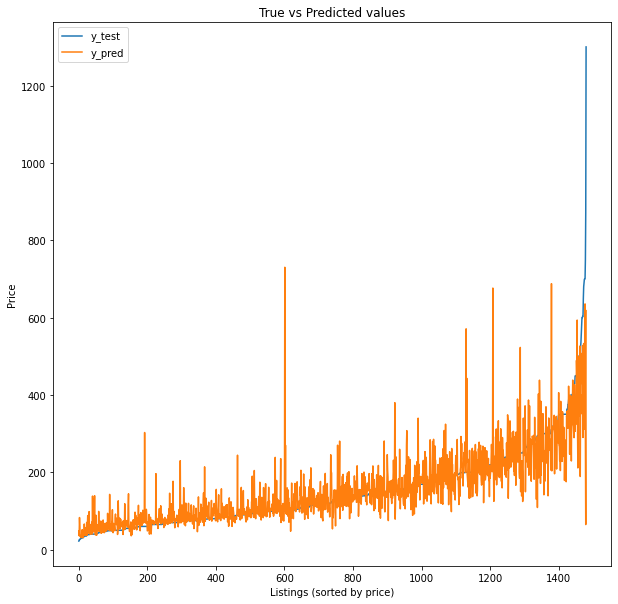

In [120]:
y_pred=best_estimator.predict(X_test)
display_results(y_test, y_pred)

#### The RandomForestRegressor looks promising!

In [90]:
# TODO: Extract the feature importances using .feature_importances_ 
importances = pd.DataFrame(best_estimator._final_estimator.feature_importances_, index =X.columns, columns=['importance']).sort_values('importance', ascending=False)
importances.head(20)

,importance
bedrooms,0.203657
longitude,0.154794
weekly_price,0.081991
room_type_Entire home/apt,0.047915
latitude,0.033811
bathrooms,0.032099
extra_people,0.027860
cleaning_fee,0.021511
availability_365,0.018861
security_deposit,0.017851


In [91]:
def display_feature_importances(feature_importances):
    # Extract the feature importances using .feature_importances_ 
    importances = pd.DataFrame(feature_importances, index =X.columns, columns=['importance']).sort_values('importance', ascending=False)
    # Plot feature importances
    importances.head(20).plot.bar();

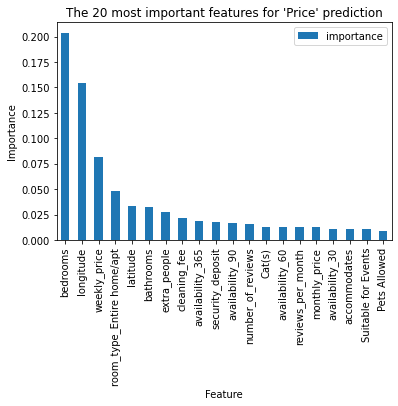

In [124]:
#importances.head(20).plot.bar();
display_feature_importances(best_estimator._final_estimator.feature_importances_)
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title("The 20 most important features for 'Price' prediction");

### Optimize The RandomForestRegressor model:

In [98]:
params1 = {'reg__n_estimators':range(50,351,50)}
params2 = {'reg__max_depth':range(4,17,2)}
params3 = {'reg__min_samples_split':[2, 5, 10, 20, 50, 100, 200]}
params4 = {'reg__min_samples_leaf':range(2,50,3)}
params5 = {'reg__max_features':[20, 35, 37, 40, 80, 100, 150, 200]}

In [99]:
params=[params1, params2, params3, params4, params5]

In [100]:
optimized_rf_reg=best_estimator

In [101]:
scorer=r2_score

In [102]:
for param in params:
    optimized_rf_reg=optimize(optimized_rf_reg, scorer, param)
    print(optimized_rf_reg)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END ..............reg__n_estimators=50;, score=0.584 total time=   5.7s
[CV 2/5] END ..............reg__n_estimators=50;, score=0.594 total time=   5.7s
[CV 3/5] END ..............reg__n_estimators=50;, score=0.258 total time=   5.7s
[CV 4/5] END ..............reg__n_estimators=50;, score=0.276 total time=   5.8s
[CV 5/5] END ..............reg__n_estimators=50;, score=0.643 total time=   5.8s
[CV 1/5] END .............reg__n_estimators=100;, score=0.593 total time=  11.8s
[CV 2/5] END .............reg__n_estimators=100;, score=0.595 total time=  11.2s
[CV 3/5] END .............reg__n_estimators=100;, score=0.261 total time=  11.1s
[CV 4/5] END .............reg__n_estimators=100;, score=0.298 total time=  11.7s
[CV 5/5] END .............reg__n_estimators=100;, score=0.650 total time=  10.6s
[CV 1/5] END .............reg__n_estimators=150;, score=0.591 total time=  16.4s
[CV 2/5] END .............reg__n_estimators=150;,

[CV 2/5] END ........reg__min_samples_split=100;, score=0.568 total time=   5.6s
[CV 3/5] END ........reg__min_samples_split=100;, score=0.240 total time=   5.7s
[CV 4/5] END ........reg__min_samples_split=100;, score=0.432 total time=   5.9s
[CV 5/5] END ........reg__min_samples_split=100;, score=0.614 total time=   5.4s
[CV 1/5] END ........reg__min_samples_split=200;, score=0.578 total time=   4.6s
[CV 2/5] END ........reg__min_samples_split=200;, score=0.545 total time=   4.8s
[CV 3/5] END ........reg__min_samples_split=200;, score=0.228 total time=   5.2s
[CV 4/5] END ........reg__min_samples_split=200;, score=0.412 total time=   5.9s
[CV 5/5] END ........reg__min_samples_split=200;, score=0.591 total time=   5.3s
Pipeline(steps=[('scaler', StandardScaler()),
                ('reg',
                 RandomForestRegressor(max_depth=16, min_samples_split=20,
                                       random_state=42))])
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/

[CV 1/5] END ..............reg__max_features=35;, score=0.610 total time=   1.2s
[CV 2/5] END ..............reg__max_features=35;, score=0.610 total time=   1.2s
[CV 3/5] END ..............reg__max_features=35;, score=0.248 total time=   1.3s
[CV 4/5] END ..............reg__max_features=35;, score=0.479 total time=   1.2s
[CV 5/5] END ..............reg__max_features=35;, score=0.609 total time=   1.2s
[CV 1/5] END ..............reg__max_features=37;, score=0.609 total time=   1.3s
[CV 2/5] END ..............reg__max_features=37;, score=0.608 total time=   1.3s
[CV 3/5] END ..............reg__max_features=37;, score=0.246 total time=   1.3s
[CV 4/5] END ..............reg__max_features=37;, score=0.477 total time=   1.3s
[CV 5/5] END ..............reg__max_features=37;, score=0.609 total time=   1.3s
[CV 1/5] END ..............reg__max_features=40;, score=0.610 total time=   1.5s
[CV 2/5] END ..............reg__max_features=40;, score=0.616 total time=   1.4s
[CV 3/5] END ..............r

In [103]:
optimized_rf_reg

Pipeline(steps=[('scaler', StandardScaler()),
                ('reg',
                 RandomForestRegressor(max_depth=16, max_features=200,
                                       min_samples_leaf=11,
                                       min_samples_split=20,
                                       random_state=42))])

Mean Squared Error (MSE):  3694.9499754050603 	R2 Score:  0.6802927231832936


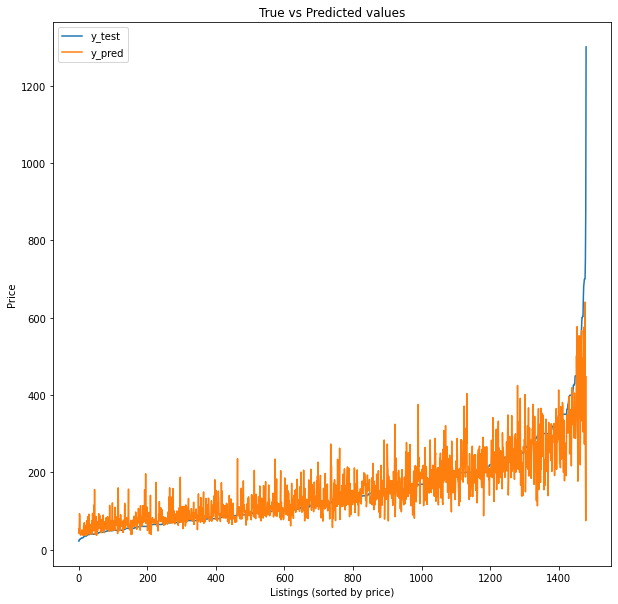

In [121]:
y_pred_optimized=optimized_rf_reg.predict(X_test)
display_results(y_test, y_pred_optimized)

c:\users\hedey\appdata\local\programs\python\python37\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Mean Squared Error (MSE):  3680.2539459119143 	R2 Score:  0.6815643040167408


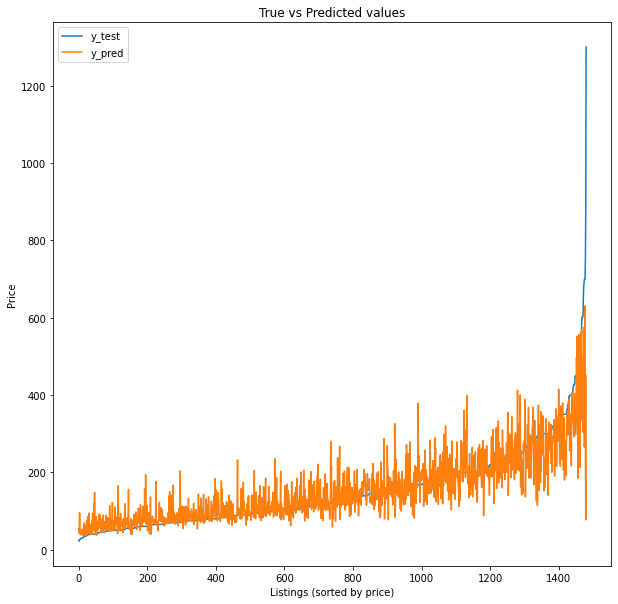

In [122]:
### Try a higher n_estimators (250 instead of 100)
optimized_rf_reg_250=Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 RandomForestRegressor(n_estimators=250, max_features=200, max_depth=16, min_samples_leaf=11,
                                       min_samples_split=20,
                                       random_state=42))])
optimized_rf_reg_250.fit(X_train, y_train)
y_pred_rf_250=optimized_rf_reg_250.predict(X_test)
display_results(y_test, y_pred_rf_250)

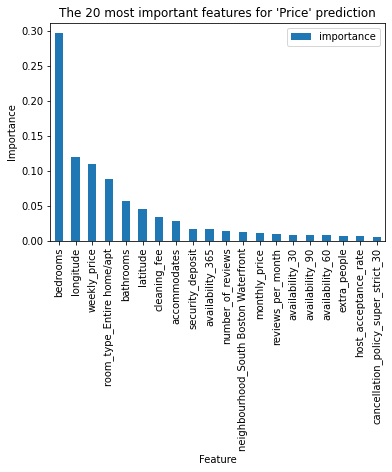

In [126]:
display_feature_importances(optimized_rf_reg_250._final_estimator.feature_importances_)
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title("The 20 most important features for 'Price' prediction");

#### Results of the RandomForestRegressor:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Mean Squared Error (MSE) |   4048.61          |   4048.60        |
| R2 Score        |   0.6496          |   0.6816        |

In [208]:
GB_pipe=Pipeline([('scaler', MinMaxScaler()),
                  ('reg', GradientBoostingRegressor(random_state=42))])
scl_params={'scaler':[MinMaxScaler(), StandardScaler()]}
best_GB_pipe=optimize(GB_pipe, r2_score, scl_params)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END .............scaler=MinMaxScaler();, score=0.482 total time=   2.7s
[CV 2/5] END .............scaler=MinMaxScaler();, score=0.605 total time=   2.7s
[CV 3/5] END .............scaler=MinMaxScaler();, score=0.252 total time=   2.7s
[CV 4/5] END .............scaler=MinMaxScaler();, score=0.478 total time=   2.7s
[CV 5/5] END .............scaler=MinMaxScaler();, score=0.566 total time=   2.8s
[CV 1/5] END ...........scaler=StandardScaler();, score=0.443 total time=   2.7s
[CV 2/5] END ...........scaler=StandardScaler();, score=0.604 total time=   2.9s
[CV 3/5] END ...........scaler=StandardScaler();, score=0.252 total time=   3.1s
[CV 4/5] END ...........scaler=StandardScaler();, score=0.479 total time=   3.1s
[CV 5/5] END ...........scaler=StandardScaler();, score=0.574 total time=   3.0s


In [209]:
best_GB_pipe

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('reg', GradientBoostingRegressor(random_state=42))])

In [215]:
params1 = {'reg__n_estimators':range(100,401,50)}
params2 = {'reg__max_depth':range(4,17,2), 'reg__min_samples_split':[2, 5, 10, 20, 50, 100, 200]}
params3 = {'reg__min_samples_leaf':range(2,50,3)}
params4 = {'reg__max_features':[20, 35, 37, 40, 80, 100, 150, 200]}
params=[params1, params2, params3, params4]

In [216]:
optimized_GB=best_GB_pipe

for param in params:
    optimized_GB=optimize(optimized_GB, scorer, param)
    print(optimized_GB)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END .............reg__n_estimators=100;, score=0.482 total time=   3.1s
[CV 2/5] END .............reg__n_estimators=100;, score=0.605 total time=   3.2s
[CV 3/5] END .............reg__n_estimators=100;, score=0.252 total time=   3.2s
[CV 4/5] END .............reg__n_estimators=100;, score=0.478 total time=   3.2s
[CV 5/5] END .............reg__n_estimators=100;, score=0.566 total time=   3.0s
[CV 1/5] END .............reg__n_estimators=150;, score=0.395 total time=   4.5s
[CV 2/5] END .............reg__n_estimators=150;, score=0.606 total time=   4.6s
[CV 3/5] END .............reg__n_estimators=150;, score=0.253 total time=   4.3s
[CV 4/5] END .............reg__n_estimators=150;, score=0.486 total time=   4.2s
[CV 5/5] END .............reg__n_estimators=150;, score=0.567 total time=   4.2s
[CV 1/5] END .............reg__n_estimators=200;, score=0.372 total time=   5.5s
[CV 2/5] END .............reg__n_estimators=200;,

[CV 4/5] END reg__max_depth=6, reg__min_samples_split=50;, score=0.178 total time=   6.2s
[CV 5/5] END reg__max_depth=6, reg__min_samples_split=50;, score=0.410 total time=   5.8s
[CV 1/5] END reg__max_depth=6, reg__min_samples_split=100;, score=0.553 total time=   6.0s
[CV 2/5] END reg__max_depth=6, reg__min_samples_split=100;, score=0.583 total time=   5.9s
[CV 3/5] END reg__max_depth=6, reg__min_samples_split=100;, score=0.261 total time=   5.8s
[CV 4/5] END reg__max_depth=6, reg__min_samples_split=100;, score=0.193 total time=   5.6s
[CV 5/5] END reg__max_depth=6, reg__min_samples_split=100;, score=0.343 total time=   6.0s
[CV 1/5] END reg__max_depth=6, reg__min_samples_split=200;, score=0.568 total time=   5.6s
[CV 2/5] END reg__max_depth=6, reg__min_samples_split=200;, score=0.606 total time=   5.8s
[CV 3/5] END reg__max_depth=6, reg__min_samples_split=200;, score=0.263 total time=   6.1s
[CV 4/5] END reg__max_depth=6, reg__min_samples_split=200;, score=0.475 total time=   5.7s
[

[CV 5/5] END reg__max_depth=12, reg__min_samples_split=5;, score=0.605 total time=  10.7s
[CV 1/5] END reg__max_depth=12, reg__min_samples_split=10;, score=0.425 total time=  12.4s
[CV 2/5] END reg__max_depth=12, reg__min_samples_split=10;, score=0.535 total time=  12.2s
[CV 3/5] END reg__max_depth=12, reg__min_samples_split=10;, score=0.246 total time=  11.4s
[CV 4/5] END reg__max_depth=12, reg__min_samples_split=10;, score=0.015 total time=  10.7s
[CV 5/5] END reg__max_depth=12, reg__min_samples_split=10;, score=0.649 total time=  10.4s
[CV 1/5] END reg__max_depth=12, reg__min_samples_split=20;, score=0.488 total time=  10.6s
[CV 2/5] END reg__max_depth=12, reg__min_samples_split=20;, score=0.568 total time=  11.4s
[CV 3/5] END reg__max_depth=12, reg__min_samples_split=20;, score=0.257 total time=  10.5s
[CV 4/5] END reg__max_depth=12, reg__min_samples_split=20;, score=0.199 total time=  10.4s
[CV 5/5] END reg__max_depth=12, reg__min_samples_split=20;, score=0.661 total time=  10.8s


[CV 5/5] END reg__max_depth=16, reg__min_samples_split=100;, score=0.296 total time=  12.9s
[CV 1/5] END reg__max_depth=16, reg__min_samples_split=200;, score=0.577 total time=  11.7s
[CV 2/5] END reg__max_depth=16, reg__min_samples_split=200;, score=0.603 total time=  11.5s
[CV 3/5] END reg__max_depth=16, reg__min_samples_split=200;, score=0.263 total time=  12.3s
[CV 4/5] END reg__max_depth=16, reg__min_samples_split=200;, score=0.456 total time=  11.8s
[CV 5/5] END reg__max_depth=16, reg__min_samples_split=200;, score=0.370 total time=  11.6s
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('reg',
                 GradientBoostingRegressor(max_depth=4, min_samples_split=10,
                                           random_state=42))])
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ...........reg__min_samples_leaf=2;, score=0.563 total time=   3.7s
[CV 2/5] END ...........reg__min_samples_leaf=2;, score=0.560 total time=   3.8s
[CV 3/5] END ...

[CV 3/5] END ..............reg__max_features=35;, score=0.267 total time=   0.6s
[CV 4/5] END ..............reg__max_features=35;, score=0.511 total time=   0.6s
[CV 5/5] END ..............reg__max_features=35;, score=0.616 total time=   0.6s
[CV 1/5] END ..............reg__max_features=37;, score=0.617 total time=   0.6s
[CV 2/5] END ..............reg__max_features=37;, score=0.609 total time=   0.6s
[CV 3/5] END ..............reg__max_features=37;, score=0.270 total time=   0.6s
[CV 4/5] END ..............reg__max_features=37;, score=0.503 total time=   0.6s
[CV 5/5] END ..............reg__max_features=37;, score=0.622 total time=   0.6s
[CV 1/5] END ..............reg__max_features=40;, score=0.626 total time=   0.7s
[CV 2/5] END ..............reg__max_features=40;, score=0.623 total time=   0.7s
[CV 3/5] END ..............reg__max_features=40;, score=0.266 total time=   0.7s
[CV 4/5] END ..............reg__max_features=40;, score=0.513 total time=   0.7s
[CV 5/5] END ..............r

In [217]:
optimized_GB

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('reg',
                 GradientBoostingRegressor(max_depth=4, max_features=20,
                                           min_samples_leaf=23,
                                           min_samples_split=10,
                                           random_state=42))])

In [218]:
y_pred_op_GB=optimized_GB.predict(X_test)
display_results(y_test, y_pred_op_GB)

3825.901568202116 0.6689620752972238


#### Increase n_estimators, and decrease the learning_rate:

In [234]:
optimized_GB_pipe_400=optimize(best_GB_pipe, r2_score, {'reg__n_estimators':[400, 600, 800, 1000], 'reg__learning_rate':[0.025, 0.017, 0.0125, .01]})

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END reg__learning_rate=0.025, reg__n_estimators=400;, score=0.629 total time=   1.6s
[CV 2/5] END reg__learning_rate=0.025, reg__n_estimators=400;, score=0.634 total time=   1.6s
[CV 3/5] END reg__learning_rate=0.025, reg__n_estimators=400;, score=0.270 total time=   1.6s
[CV 4/5] END reg__learning_rate=0.025, reg__n_estimators=400;, score=0.510 total time=   1.5s
[CV 5/5] END reg__learning_rate=0.025, reg__n_estimators=400;, score=0.638 total time=   1.5s
[CV 1/5] END reg__learning_rate=0.025, reg__n_estimators=600;, score=0.633 total time=   2.3s
[CV 2/5] END reg__learning_rate=0.025, reg__n_estimators=600;, score=0.640 total time=   2.4s
[CV 3/5] END reg__learning_rate=0.025, reg__n_estimators=600;, score=0.277 total time=   2.4s
[CV 4/5] END reg__learning_rate=0.025, reg__n_estimators=600;, score=0.516 total time=   2.4s
[CV 5/5] END reg__learning_rate=0.025, reg__n_estimators=600;, score=0.648 total time=   2.3s

In [ ]:
optimized_GB_pipe_400

In [236]:
best_GB_pipe_400

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('reg',
                 GradientBoostingRegressor(learning_rate=0.025, max_depth=4,
                                           max_features=20, min_samples_leaf=23,
                                           min_samples_split=10,
                                           n_estimators=800,
                                           random_state=42))])

In [ ]:
y_pred_op_400=optimized_GB_pipe_400.predict(X_test)
display_results(y_test, y_pred_op_400)

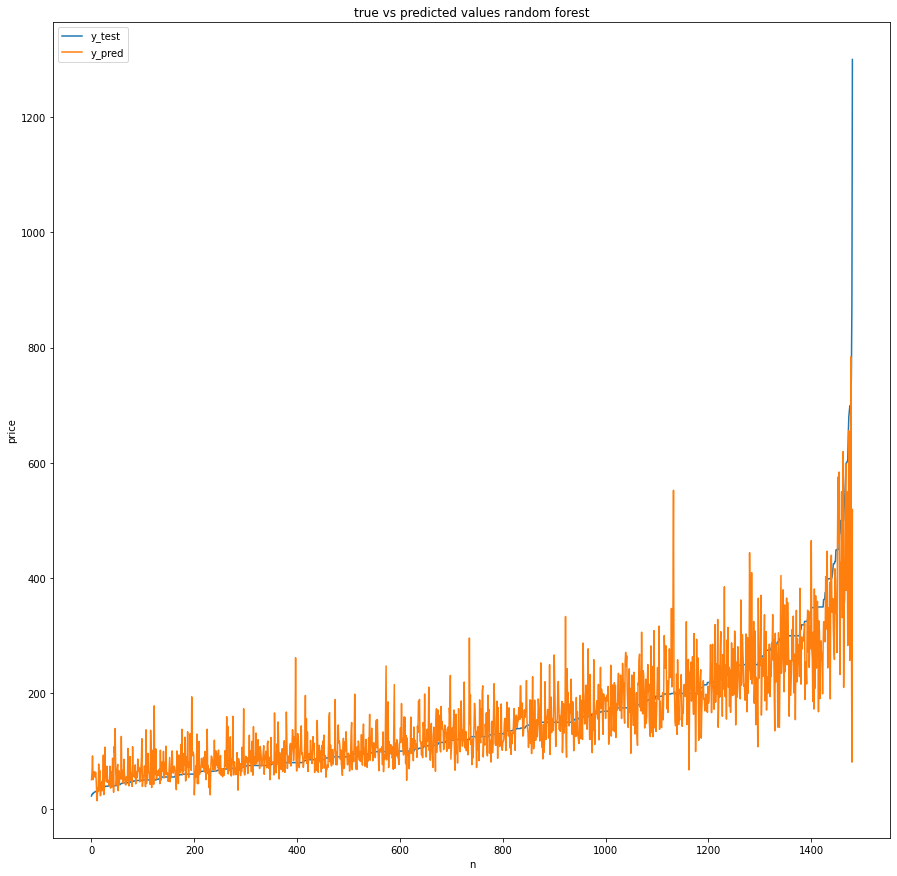

In [235]:
# prepare data for plot
d = {'y_test': y_test.values.flatten(), 'y_pred': y_pred_400}
df = pd.DataFrame(d)
df = df.sort_values('y_test')
df = df.reset_index(drop=True)

# plot true (test) vs predicted values
df.plot(figsize=(15,15))
plt.ylabel('price')
plt.xlabel('n')
plt.title('true vs predicted values random forest')
#plt.savefig('figures/6_true_pred_under200.png', bbox_inches='tight')
plt.show()

In [241]:
pipe_GB_test=Pipeline([('scaler', MinMaxScaler()),
                       ('reg', GradientBoostingRegressor(max_depth=11, max_features=20, min_samples_leaf=20,
                          min_samples_split=200, n_estimators=2000, learning_rate=0.01,
                          random_state=42))])
pipe_GB_test.fit(X_train, y_train.values)

c:\users\hedey\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('scaler', MinMaxScaler()),
                ('reg',
                 GradientBoostingRegressor(learning_rate=0.01, max_depth=11,
                                           max_features=20, min_samples_leaf=20,
                                           min_samples_split=200,
                                           n_estimators=2000,
                                           random_state=42))])

In [242]:
y_pred_test=pipe_GB_test.predict(X_test)

In [245]:
print(mean_squared_error(y_test, y_pred_test), r2_score(y_test, y_pred_test))

3514.7033383901953 0.6958886478531734


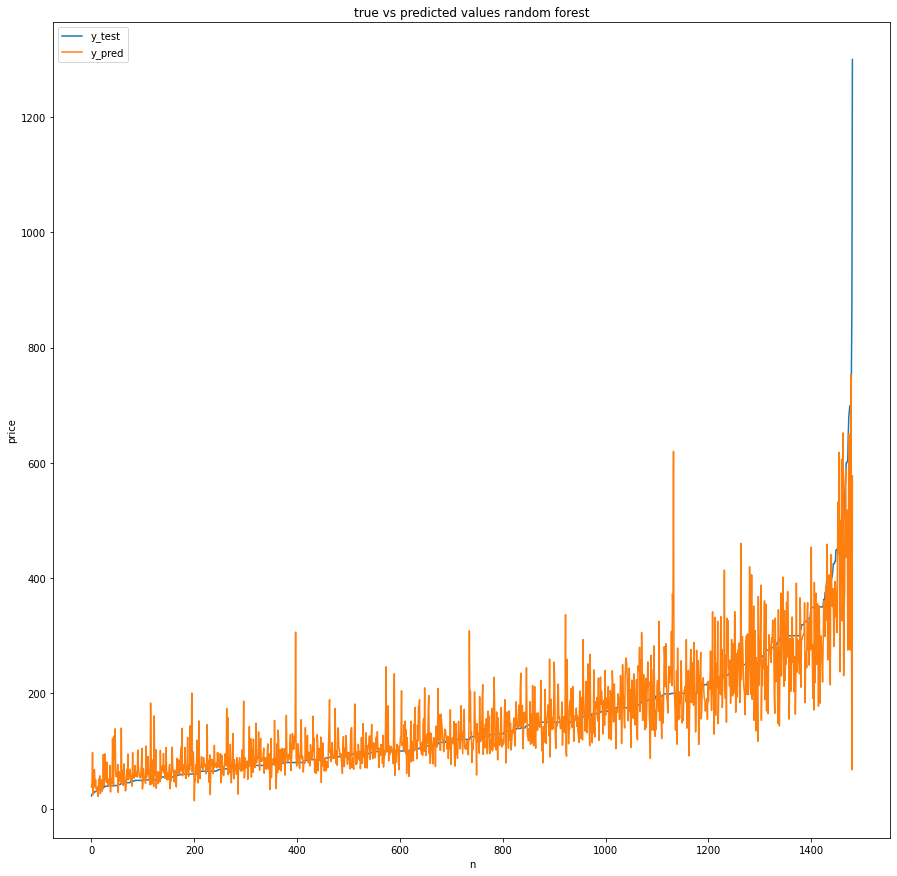

In [246]:
# prepare data for plot
d = {'y_test': y_test.values.flatten(), 'y_pred': y_pred_test}
df = pd.DataFrame(d)
df = df.sort_values('y_test')
df = df.reset_index(drop=True)

# plot true (test) vs predicted values
df.plot(figsize=(15,15))
plt.ylabel('price')
plt.xlabel('n')
plt.title('true vs predicted values random forest')
#plt.savefig('figures/6_true_pred_under200.png', bbox_inches='tight')
plt.show()

In [38]:
XGB_pipe=Pipeline([('scaler', MinMaxScaler()),
                  ('reg', xgb.XGBRegressor(random_state=42))])
scl_params={'scaler':[MinMaxScaler(), StandardScaler()]}
best_XGB_pipe=optimize(XGB_pipe, r2_score, scl_params)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END .............scaler=MinMaxScaler();, score=0.518 total time=   1.0s
[CV 2/5] END .............scaler=MinMaxScaler();, score=0.590 total time=   1.1s
[CV 3/5] END .............scaler=MinMaxScaler();, score=0.250 total time=   1.0s
[CV 4/5] END .............scaler=MinMaxScaler();, score=0.247 total time=   1.0s
[CV 5/5] END .............scaler=MinMaxScaler();, score=0.553 total time=   1.0s
[CV 1/5] END ...........scaler=StandardScaler();, score=0.534 total time=   1.1s
[CV 2/5] END ...........scaler=StandardScaler();, score=0.591 total time=   1.0s
[CV 3/5] END ...........scaler=StandardScaler();, score=0.243 total time=   1.0s
[CV 4/5] END ...........scaler=StandardScaler();, score=0.245 total time=   1.0s
[CV 5/5] END ...........scaler=StandardScaler();, score=0.554 total time=   1.0s


In [39]:
best_XGB_pipe

Pipeline(steps=[('scaler', StandardScaler()),
                ('reg',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=6, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=100, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=42, reg_alpha=0,
                             

In [41]:
params1 = {'reg__max_depth':[ 3, 4, 5, 6, 8, 10, 12, 15], "reg__min_child_weight" : [ 1, 3, 5, 7 ], 'reg__gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ]}
params2 = {'reg__colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7 ], 'reg__learning_rate':[0.05, 0.10, 0.15, 0.20, 0.25, 0.30]}
params=[params1, params2]

In [42]:
optimized_XGB=best_XGB_pipe

for param in params:
    optimized_XGB=optimize(optimized_XGB, r2_score, param)
    print(optimized_XGB)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
[CV 1/5] END reg__gamma=0.0, reg__max_depth=3, reg__min_child_weight=1;, score=0.449 total time=   0.5s
[CV 2/5] END reg__gamma=0.0, reg__max_depth=3, reg__min_child_weight=1;, score=0.588 total time=   0.6s
[CV 3/5] END reg__gamma=0.0, reg__max_depth=3, reg__min_child_weight=1;, score=0.264 total time=   0.6s
[CV 4/5] END reg__gamma=0.0, reg__max_depth=3, reg__min_child_weight=1;, score=0.472 total time=   0.6s
[CV 5/5] END reg__gamma=0.0, reg__max_depth=3, reg__min_child_weight=1;, score=0.469 total time=   0.6s
[CV 1/5] END reg__gamma=0.0, reg__max_depth=3, reg__min_child_weight=3;, score=0.547 total time=   0.6s
[CV 2/5] END reg__gamma=0.0, reg__max_depth=3, reg__min_child_weight=3;, score=0.552 total time=   0.6s
[CV 3/5] END reg__gamma=0.0, reg__max_depth=3, reg__min_child_weight=3;, score=0.270 total time=   0.6s
[CV 4/5] END reg__gamma=0.0, reg__max_depth=3, reg__min_child_weight=3;, score=0.435 total time=   0.6s
[

[CV 5/5] END reg__gamma=0.0, reg__max_depth=6, reg__min_child_weight=7;, score=0.564 total time=   1.1s
[CV 1/5] END reg__gamma=0.0, reg__max_depth=8, reg__min_child_weight=1;, score=0.543 total time=   1.6s
[CV 2/5] END reg__gamma=0.0, reg__max_depth=8, reg__min_child_weight=1;, score=0.592 total time=   1.6s
[CV 3/5] END reg__gamma=0.0, reg__max_depth=8, reg__min_child_weight=1;, score=0.271 total time=   1.5s
[CV 4/5] END reg__gamma=0.0, reg__max_depth=8, reg__min_child_weight=1;, score=0.098 total time=   1.6s
[CV 5/5] END reg__gamma=0.0, reg__max_depth=8, reg__min_child_weight=1;, score=0.629 total time=   1.6s
[CV 1/5] END reg__gamma=0.0, reg__max_depth=8, reg__min_child_weight=3;, score=0.543 total time=   1.5s
[CV 2/5] END reg__gamma=0.0, reg__max_depth=8, reg__min_child_weight=3;, score=0.569 total time=   1.6s
[CV 3/5] END reg__gamma=0.0, reg__max_depth=8, reg__min_child_weight=3;, score=0.257 total time=   1.5s
[CV 4/5] END reg__gamma=0.0, reg__max_depth=8, reg__min_child_we

[CV 4/5] END reg__gamma=0.0, reg__max_depth=15, reg__min_child_weight=7;, score=0.394 total time=   2.8s
[CV 5/5] END reg__gamma=0.0, reg__max_depth=15, reg__min_child_weight=7;, score=0.538 total time=   2.9s
[CV 1/5] END reg__gamma=0.1, reg__max_depth=3, reg__min_child_weight=1;, score=0.449 total time=   0.7s
[CV 2/5] END reg__gamma=0.1, reg__max_depth=3, reg__min_child_weight=1;, score=0.588 total time=   0.7s
[CV 3/5] END reg__gamma=0.1, reg__max_depth=3, reg__min_child_weight=1;, score=0.264 total time=   0.7s
[CV 4/5] END reg__gamma=0.1, reg__max_depth=3, reg__min_child_weight=1;, score=0.472 total time=   0.7s
[CV 5/5] END reg__gamma=0.1, reg__max_depth=3, reg__min_child_weight=1;, score=0.469 total time=   0.7s
[CV 1/5] END reg__gamma=0.1, reg__max_depth=3, reg__min_child_weight=3;, score=0.547 total time=   0.7s
[CV 2/5] END reg__gamma=0.1, reg__max_depth=3, reg__min_child_weight=3;, score=0.552 total time=   0.7s
[CV 3/5] END reg__gamma=0.1, reg__max_depth=3, reg__min_child_

[CV 3/5] END reg__gamma=0.1, reg__max_depth=6, reg__min_child_weight=7;, score=0.239 total time=   1.2s
[CV 4/5] END reg__gamma=0.1, reg__max_depth=6, reg__min_child_weight=7;, score=0.400 total time=   1.2s
[CV 5/5] END reg__gamma=0.1, reg__max_depth=6, reg__min_child_weight=7;, score=0.564 total time=   1.2s
[CV 1/5] END reg__gamma=0.1, reg__max_depth=8, reg__min_child_weight=1;, score=0.541 total time=   1.6s
[CV 2/5] END reg__gamma=0.1, reg__max_depth=8, reg__min_child_weight=1;, score=0.590 total time=   1.6s
[CV 3/5] END reg__gamma=0.1, reg__max_depth=8, reg__min_child_weight=1;, score=0.277 total time=   1.6s
[CV 4/5] END reg__gamma=0.1, reg__max_depth=8, reg__min_child_weight=1;, score=0.097 total time=   1.6s
[CV 5/5] END reg__gamma=0.1, reg__max_depth=8, reg__min_child_weight=1;, score=0.626 total time=   1.6s
[CV 1/5] END reg__gamma=0.1, reg__max_depth=8, reg__min_child_weight=3;, score=0.543 total time=   1.6s
[CV 2/5] END reg__gamma=0.1, reg__max_depth=8, reg__min_child_we

[CV 2/5] END reg__gamma=0.1, reg__max_depth=15, reg__min_child_weight=7;, score=0.461 total time=   3.2s
[CV 3/5] END reg__gamma=0.1, reg__max_depth=15, reg__min_child_weight=7;, score=0.247 total time=   2.9s
[CV 4/5] END reg__gamma=0.1, reg__max_depth=15, reg__min_child_weight=7;, score=0.394 total time=   3.0s
[CV 5/5] END reg__gamma=0.1, reg__max_depth=15, reg__min_child_weight=7;, score=0.524 total time=   3.0s
[CV 1/5] END reg__gamma=0.2, reg__max_depth=3, reg__min_child_weight=1;, score=0.449 total time=   0.7s
[CV 2/5] END reg__gamma=0.2, reg__max_depth=3, reg__min_child_weight=1;, score=0.588 total time=   0.7s
[CV 3/5] END reg__gamma=0.2, reg__max_depth=3, reg__min_child_weight=1;, score=0.264 total time=   0.7s
[CV 4/5] END reg__gamma=0.2, reg__max_depth=3, reg__min_child_weight=1;, score=0.472 total time=   0.7s
[CV 5/5] END reg__gamma=0.2, reg__max_depth=3, reg__min_child_weight=1;, score=0.469 total time=   0.7s
[CV 1/5] END reg__gamma=0.2, reg__max_depth=3, reg__min_chil

[CV 1/5] END reg__gamma=0.2, reg__max_depth=6, reg__min_child_weight=7;, score=0.543 total time=   1.2s
[CV 2/5] END reg__gamma=0.2, reg__max_depth=6, reg__min_child_weight=7;, score=0.502 total time=   1.2s
[CV 3/5] END reg__gamma=0.2, reg__max_depth=6, reg__min_child_weight=7;, score=0.239 total time=   1.2s
[CV 4/5] END reg__gamma=0.2, reg__max_depth=6, reg__min_child_weight=7;, score=0.400 total time=   1.4s
[CV 5/5] END reg__gamma=0.2, reg__max_depth=6, reg__min_child_weight=7;, score=0.564 total time=   1.2s
[CV 1/5] END reg__gamma=0.2, reg__max_depth=8, reg__min_child_weight=1;, score=0.544 total time=   1.6s
[CV 2/5] END reg__gamma=0.2, reg__max_depth=8, reg__min_child_weight=1;, score=0.590 total time=   1.7s
[CV 3/5] END reg__gamma=0.2, reg__max_depth=8, reg__min_child_weight=1;, score=0.273 total time=   1.7s
[CV 4/5] END reg__gamma=0.2, reg__max_depth=8, reg__min_child_weight=1;, score=0.102 total time=   1.8s
[CV 5/5] END reg__gamma=0.2, reg__max_depth=8, reg__min_child_we

[CV 5/5] END reg__gamma=0.2, reg__max_depth=15, reg__min_child_weight=5;, score=0.516 total time=   3.1s
[CV 1/5] END reg__gamma=0.2, reg__max_depth=15, reg__min_child_weight=7;, score=0.469 total time=   3.0s
[CV 2/5] END reg__gamma=0.2, reg__max_depth=15, reg__min_child_weight=7;, score=0.461 total time=   3.0s
[CV 3/5] END reg__gamma=0.2, reg__max_depth=15, reg__min_child_weight=7;, score=0.247 total time=   2.9s
[CV 4/5] END reg__gamma=0.2, reg__max_depth=15, reg__min_child_weight=7;, score=0.394 total time=   3.0s
[CV 5/5] END reg__gamma=0.2, reg__max_depth=15, reg__min_child_weight=7;, score=0.524 total time=   3.0s
[CV 1/5] END reg__gamma=0.3, reg__max_depth=3, reg__min_child_weight=1;, score=0.449 total time=   0.7s
[CV 2/5] END reg__gamma=0.3, reg__max_depth=3, reg__min_child_weight=1;, score=0.588 total time=   0.7s
[CV 3/5] END reg__gamma=0.3, reg__max_depth=3, reg__min_child_weight=1;, score=0.264 total time=   0.7s
[CV 4/5] END reg__gamma=0.3, reg__max_depth=3, reg__min_ch

[CV 4/5] END reg__gamma=0.3, reg__max_depth=6, reg__min_child_weight=5;, score=0.396 total time=   1.2s
[CV 5/5] END reg__gamma=0.3, reg__max_depth=6, reg__min_child_weight=5;, score=0.525 total time=   1.2s
[CV 1/5] END reg__gamma=0.3, reg__max_depth=6, reg__min_child_weight=7;, score=0.543 total time=   1.2s
[CV 2/5] END reg__gamma=0.3, reg__max_depth=6, reg__min_child_weight=7;, score=0.502 total time=   1.2s
[CV 3/5] END reg__gamma=0.3, reg__max_depth=6, reg__min_child_weight=7;, score=0.239 total time=   1.2s
[CV 4/5] END reg__gamma=0.3, reg__max_depth=6, reg__min_child_weight=7;, score=0.400 total time=   1.2s
[CV 5/5] END reg__gamma=0.3, reg__max_depth=6, reg__min_child_weight=7;, score=0.564 total time=   1.2s
[CV 1/5] END reg__gamma=0.3, reg__max_depth=8, reg__min_child_weight=1;, score=0.545 total time=   1.6s
[CV 2/5] END reg__gamma=0.3, reg__max_depth=8, reg__min_child_weight=1;, score=0.588 total time=   1.6s
[CV 3/5] END reg__gamma=0.3, reg__max_depth=8, reg__min_child_we

[CV 3/5] END reg__gamma=0.3, reg__max_depth=15, reg__min_child_weight=5;, score=0.253 total time=   3.1s
[CV 4/5] END reg__gamma=0.3, reg__max_depth=15, reg__min_child_weight=5;, score=0.404 total time=   3.3s
[CV 5/5] END reg__gamma=0.3, reg__max_depth=15, reg__min_child_weight=5;, score=0.515 total time=   3.2s
[CV 1/5] END reg__gamma=0.3, reg__max_depth=15, reg__min_child_weight=7;, score=0.469 total time=   3.0s
[CV 2/5] END reg__gamma=0.3, reg__max_depth=15, reg__min_child_weight=7;, score=0.461 total time=   3.0s
[CV 3/5] END reg__gamma=0.3, reg__max_depth=15, reg__min_child_weight=7;, score=0.247 total time=   3.0s
[CV 4/5] END reg__gamma=0.3, reg__max_depth=15, reg__min_child_weight=7;, score=0.394 total time=   3.1s
[CV 5/5] END reg__gamma=0.3, reg__max_depth=15, reg__min_child_weight=7;, score=0.542 total time=   3.2s
[CV 1/5] END reg__gamma=0.4, reg__max_depth=3, reg__min_child_weight=1;, score=0.449 total time=   0.8s
[CV 2/5] END reg__gamma=0.4, reg__max_depth=3, reg__min_

[CV 2/5] END reg__gamma=0.4, reg__max_depth=6, reg__min_child_weight=5;, score=0.496 total time=   1.2s
[CV 3/5] END reg__gamma=0.4, reg__max_depth=6, reg__min_child_weight=5;, score=0.254 total time=   1.2s
[CV 4/5] END reg__gamma=0.4, reg__max_depth=6, reg__min_child_weight=5;, score=0.396 total time=   1.3s
[CV 5/5] END reg__gamma=0.4, reg__max_depth=6, reg__min_child_weight=5;, score=0.525 total time=   1.3s
[CV 1/5] END reg__gamma=0.4, reg__max_depth=6, reg__min_child_weight=7;, score=0.543 total time=   1.2s
[CV 2/5] END reg__gamma=0.4, reg__max_depth=6, reg__min_child_weight=7;, score=0.502 total time=   1.2s
[CV 3/5] END reg__gamma=0.4, reg__max_depth=6, reg__min_child_weight=7;, score=0.239 total time=   1.2s
[CV 4/5] END reg__gamma=0.4, reg__max_depth=6, reg__min_child_weight=7;, score=0.400 total time=   1.2s
[CV 5/5] END reg__gamma=0.4, reg__max_depth=6, reg__min_child_weight=7;, score=0.564 total time=   1.3s
[CV 1/5] END reg__gamma=0.4, reg__max_depth=8, reg__min_child_we

[CV 1/5] END reg__gamma=0.4, reg__max_depth=15, reg__min_child_weight=5;, score=0.487 total time=   3.3s
[CV 2/5] END reg__gamma=0.4, reg__max_depth=15, reg__min_child_weight=5;, score=0.474 total time=   3.1s
[CV 3/5] END reg__gamma=0.4, reg__max_depth=15, reg__min_child_weight=5;, score=0.253 total time=   3.1s
[CV 4/5] END reg__gamma=0.4, reg__max_depth=15, reg__min_child_weight=5;, score=0.405 total time=   3.3s
[CV 5/5] END reg__gamma=0.4, reg__max_depth=15, reg__min_child_weight=5;, score=0.518 total time=   3.2s
[CV 1/5] END reg__gamma=0.4, reg__max_depth=15, reg__min_child_weight=7;, score=0.469 total time=   3.1s
[CV 2/5] END reg__gamma=0.4, reg__max_depth=15, reg__min_child_weight=7;, score=0.459 total time=   3.0s
[CV 3/5] END reg__gamma=0.4, reg__max_depth=15, reg__min_child_weight=7;, score=0.247 total time=   2.9s
[CV 4/5] END reg__gamma=0.4, reg__max_depth=15, reg__min_child_weight=7;, score=0.394 total time=   3.0s
[CV 5/5] END reg__gamma=0.4, reg__max_depth=15, reg__mi

[CV 4/5] END reg__colsample_bytree=0.5, reg__learning_rate=0.05;, score=0.466 total time=   0.5s
[CV 5/5] END reg__colsample_bytree=0.5, reg__learning_rate=0.05;, score=0.591 total time=   0.5s
[CV 1/5] END reg__colsample_bytree=0.5, reg__learning_rate=0.1;, score=0.608 total time=   0.5s
[CV 2/5] END reg__colsample_bytree=0.5, reg__learning_rate=0.1;, score=0.598 total time=   0.5s
[CV 3/5] END reg__colsample_bytree=0.5, reg__learning_rate=0.1;, score=0.263 total time=   0.5s
[CV 4/5] END reg__colsample_bytree=0.5, reg__learning_rate=0.1;, score=0.474 total time=   0.5s
[CV 5/5] END reg__colsample_bytree=0.5, reg__learning_rate=0.1;, score=0.589 total time=   0.5s
[CV 1/5] END reg__colsample_bytree=0.5, reg__learning_rate=0.15;, score=0.598 total time=   0.5s
[CV 2/5] END reg__colsample_bytree=0.5, reg__learning_rate=0.15;, score=0.619 total time=   0.5s
[CV 3/5] END reg__colsample_bytree=0.5, reg__learning_rate=0.15;, score=0.271 total time=   0.5s
[CV 4/5] END reg__colsample_bytree=

Mean Squared Error (MSE):  4033.1055804599055 	R2 Score:  0.6510336511114074


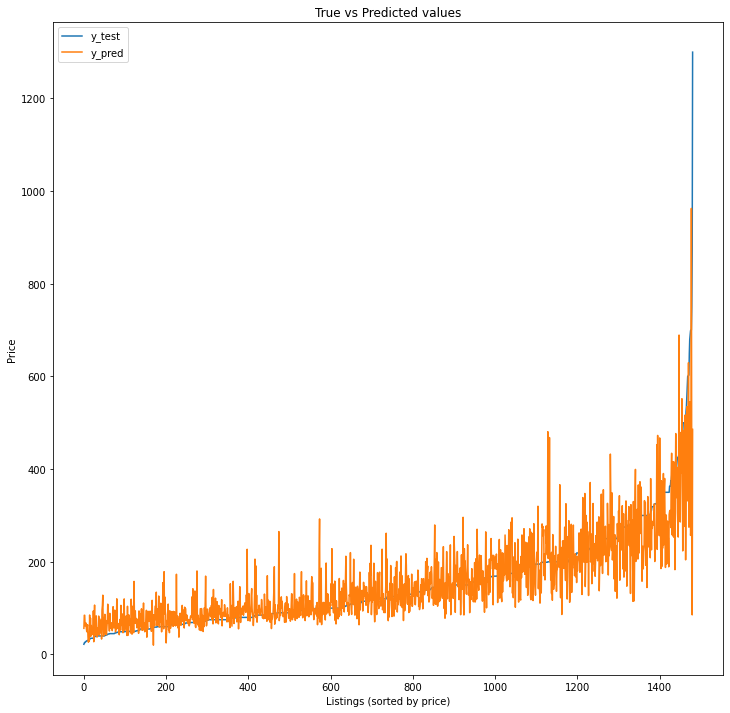

In [44]:
y_pred_op_XGB=optimized_XGB.predict(X_test)
display_results(y_test, y_pred_op_XGB)

In [45]:
optimized_XGB_pipe_400=optimize(optimized_XGB, r2_score, {'reg__n_estimators':[400, 600, 800, 1000], 'reg__learning_rate':[0.025, 0.017, 0.0125, .01]})

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END reg__learning_rate=0.025, reg__n_estimators=400;, score=0.614 total time=   1.4s
[CV 2/5] END reg__learning_rate=0.025, reg__n_estimators=400;, score=0.588 total time=   1.4s
[CV 3/5] END reg__learning_rate=0.025, reg__n_estimators=400;, score=0.261 total time=   1.5s
[CV 4/5] END reg__learning_rate=0.025, reg__n_estimators=400;, score=0.486 total time=   1.4s
[CV 5/5] END reg__learning_rate=0.025, reg__n_estimators=400;, score=0.606 total time=   1.5s
[CV 1/5] END reg__learning_rate=0.025, reg__n_estimators=600;, score=0.616 total time=   2.1s
[CV 2/5] END reg__learning_rate=0.025, reg__n_estimators=600;, score=0.594 total time=   2.3s
[CV 3/5] END reg__learning_rate=0.025, reg__n_estimators=600;, score=0.268 total time=   2.2s
[CV 4/5] END reg__learning_rate=0.025, reg__n_estimators=600;, score=0.495 total time=   2.3s
[CV 5/5] END reg__learning_rate=0.025, reg__n_estimators=600;, score=0.605 total time=   2.2s

Mean Squared Error (MSE):  3880.1126901921925 	R2 Score:  0.6642714325821689


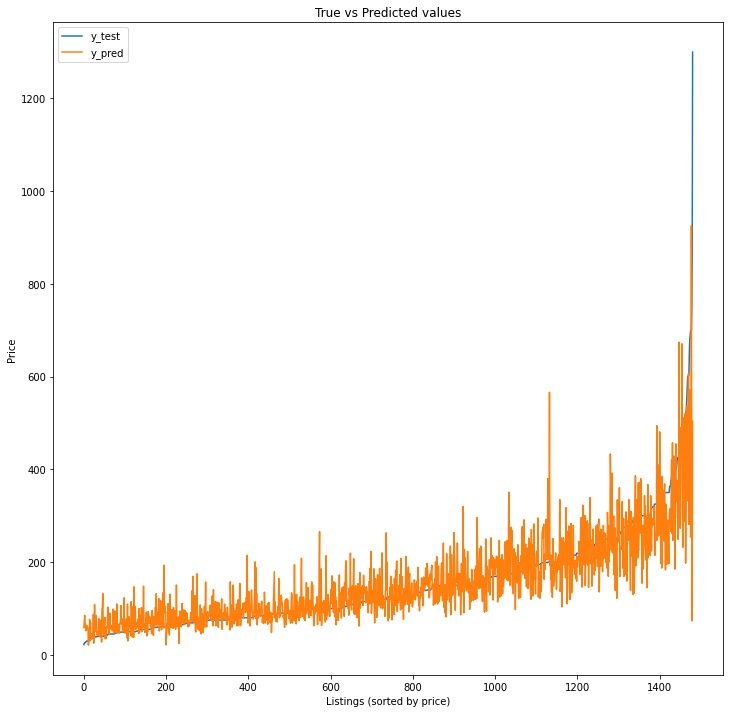

In [46]:
y_pred_op_XGB_400=optimized_XGB_pipe_400.predict(X_test)
display_results(y_test, y_pred_op_XGB_400)

In [47]:
params={'reg__n_estimators': [100, 500, 1000],
        'reg__max_depth': [3, 5, 7],
        'reg__learning_rate': [0.01, 0.05, 0.1],
        'reg__min_child_weight': [1, 3, 5],
        'reg__subsample': [0.6, 0.8, 1.0],
        'reg__colsample_bytree': [0.6, 0.8, 1.0],
        'reg__gamma': [0.01, 0.1, 1],
        'reg__reg_alpha': [0.01, 0.1, 1]}

In [ ]:
XGB_opt_2=optimize(optimized_XGB_pipe_400, r2_score, params)

Fitting 5 folds for each of 6561 candidates, totalling 32805 fits
[CV 1/5] END reg__colsample_bytree=0.6, reg__gamma=0.01, reg__learning_rate=0.01, reg__max_depth=3, reg__min_child_weight=1, reg__n_estimators=100, reg__reg_alpha=0.01, reg__subsample=0.6;, score=0.187 total time=   0.5s
[CV 2/5] END reg__colsample_bytree=0.6, reg__gamma=0.01, reg__learning_rate=0.01, reg__max_depth=3, reg__min_child_weight=1, reg__n_estimators=100, reg__reg_alpha=0.01, reg__subsample=0.6;, score=0.198 total time=   0.5s
[CV 3/5] END reg__colsample_bytree=0.6, reg__gamma=0.01, reg__learning_rate=0.01, reg__max_depth=3, reg__min_child_weight=1, reg__n_estimators=100, reg__reg_alpha=0.01, reg__subsample=0.6;, score=0.051 total time=   0.6s
[CV 4/5] END reg__colsample_bytree=0.6, reg__gamma=0.01, reg__learning_rate=0.01, reg__max_depth=3, reg__min_child_weight=1, reg__n_estimators=100, reg__reg_alpha=0.01, reg__subsample=0.6;, score=0.114 total time=   0.5s
[CV 5/5] END reg__colsample_bytree=0.6, reg__gamma

[CV 3/5] END reg__colsample_bytree=0.6, reg__gamma=0.01, reg__learning_rate=0.01, reg__max_depth=3, reg__min_child_weight=1, reg__n_estimators=100, reg__reg_alpha=1, reg__subsample=0.8;, score=0.052 total time=   0.6s
[CV 4/5] END reg__colsample_bytree=0.6, reg__gamma=0.01, reg__learning_rate=0.01, reg__max_depth=3, reg__min_child_weight=1, reg__n_estimators=100, reg__reg_alpha=1, reg__subsample=0.8;, score=0.118 total time=   0.5s
[CV 5/5] END reg__colsample_bytree=0.6, reg__gamma=0.01, reg__learning_rate=0.01, reg__max_depth=3, reg__min_child_weight=1, reg__n_estimators=100, reg__reg_alpha=1, reg__subsample=0.8;, score=0.171 total time=   0.5s
[CV 1/5] END reg__colsample_bytree=0.6, reg__gamma=0.01, reg__learning_rate=0.01, reg__max_depth=3, reg__min_child_weight=1, reg__n_estimators=100, reg__reg_alpha=1, reg__subsample=1.0;, score=0.202 total time=   0.4s
[CV 2/5] END reg__colsample_bytree=0.6, reg__gamma=0.01, reg__learning_rate=0.01, reg__max_depth=3, reg__min_child_weight=1, reg

[CV 1/5] END reg__colsample_bytree=0.6, reg__gamma=0.01, reg__learning_rate=0.01, reg__max_depth=3, reg__min_child_weight=1, reg__n_estimators=500, reg__reg_alpha=1, reg__subsample=0.6;, score=0.575 total time=   2.6s
[CV 2/5] END reg__colsample_bytree=0.6, reg__gamma=0.01, reg__learning_rate=0.01, reg__max_depth=3, reg__min_child_weight=1, reg__n_estimators=500, reg__reg_alpha=1, reg__subsample=0.6;, score=0.590 total time=   2.6s
[CV 3/5] END reg__colsample_bytree=0.6, reg__gamma=0.01, reg__learning_rate=0.01, reg__max_depth=3, reg__min_child_weight=1, reg__n_estimators=500, reg__reg_alpha=1, reg__subsample=0.6;, score=0.247 total time=   2.6s
[CV 4/5] END reg__colsample_bytree=0.6, reg__gamma=0.01, reg__learning_rate=0.01, reg__max_depth=3, reg__min_child_weight=1, reg__n_estimators=500, reg__reg_alpha=1, reg__subsample=0.6;, score=0.469 total time=   2.6s
[CV 5/5] END reg__colsample_bytree=0.6, reg__gamma=0.01, reg__learning_rate=0.01, reg__max_depth=3, reg__min_child_weight=1, reg

In [265]:
est = GradientBoostingRegressor(n_estimators=400,learning_rate=0.01, max_depth=10, random_state=42, loss='squared_error')

In [266]:
est.fit(X_train, y_train)

c:\users\hedey\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(learning_rate=0.01, max_depth=10, n_estimators=400,
                          random_state=42)

In [267]:
y_pred=est.predict(X_test)

In [268]:
mean_squared_error(y_test, y_pred)

1032.2756016595379

In [269]:
r2_score(y_test, y_pred)

0.7183829038181593

In [271]:
pd.concat([y_test.reset_index(), pd.DataFrame(y_pred)], axis=1)

,index,price,0
0,4366,50.0,48.948925
1,3197,185.0,226.929626
2,4367,105.0,120.415086
3,5014,80.0,116.753020
4,554,179.0,218.738886
5,6240,85.0,85.015664
6,4693,85.0,115.221881
7,3770,250.0,212.403196
8,6045,100.0,101.770067
9,263,55.0,92.965233


In [187]:
X.describe()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,accommodates,bathrooms,bedrooms,beds,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,Dryer,Elevator in Building,Essentials,Family/Kid Friendly,Fire Extinguisher,First Aid Kit,Free Parking on Premises,Free Parking on Street,Gym,Hair Dryer,Hangers,Heating,Hot Tub,Indoor Fireplace,Internet,Iron,Kitchen,Laptop Friendly Workspace,Lock on Bedroom Door,Other pet(s),Paid Parking Off Premises,Pets Allowed,Pets live on this property,Pool,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,neighbourhood_Adams,neighbourhood_Alki,neighbourhood_Allston,neighbourhood_Arbor Heights,neighbourhood_Atlantic,neighbourhood_Back Bay,neighbourhood_Bay Village,neighbourhood_Beacon Hill,neighbourhood_Belltown,neighbourhood_Bitter Lake,neighbourhood_Briarcliff,neighbourhood_Brighton,neighbourhood_Broadview,neighbourhood_Broadway,neighbourhood_Bryant,neighbourhood_Cedar Park,neighbourhood_Central Business District,neighbourhood_Charlestown,neighbourhood_Chinatown,neighbourhood_Columbia City,neighbourhood_Crown Hill,neighbourhood_Dorchester,neighbourhood_Downtown,neighbourhood_Dunlap,neighbourhood_East Boston,neighbourhood_East Queen Anne,neighbourhood_Eastlake,neighbourhood_Fairmount Park,neighbourhood_Fauntleroy,neighbourhood_Fenway,neighbourhood_First Hill,neighbourhood_Fremont,neighbourhood_Gatewood,neighbourhood_Genesee,neighbourhood_Georgetown,neighbourhood_Green Lake,neighbourhood_Greenwood,neighbourhood_Haller Lake,neighbourhood_Harrison/Denny-Blaine,neighbourhood_High Point,neighbourhood_Highland Park,neighbourhood_Holly Park,neighbourhood_Hyde Park,neighbourhood_Industrial District,neighbourhood_Interbay,neighbourhood_International District,neighbourhood_Jamaica Plain,neighbourhood_Laurelhurst,neighbourhood_Lawton Park,neighbourhood_Leather District,neighbourhood_Leschi,neighbourhood_Longwood Medical Area,neighbourhood_Lower Queen Anne,neighbourhood_Loyal Heights,neighbourhood_Madison Park,neighbourhood_Madrona,neighbourhood_Mann,neighbourhood_Maple Leaf,neighbourhood_Mattapan,neighbourhood_Matthews Beach,neighbourhood_Meadowbrook,neighbourhood_Mid-Beacon Hill,neighbourhood_Minor,neighbourhood_Mission Hill,neighbourhood_Montlake,neighbourhood_Mount Baker,neighbourhood_North Admiral,neighbourhood_North Beach/Blue Ridge,neighbourhood_North Beacon Hill,neighbourhood_North College Park,neighbourhood_North Delridge,neighbourhood_North End,neighbourhood_North Queen Anne,neighbourhood_Olympic Hills,neighbourhood_Phinney Ridge,neighbourhood_Pike-Market,neighbourhood_Pinehurst,neighbourhood_Pioneer Square,neighbourhood_Portage Bay,neighbourhood_Rainier Beach,neighbourhood_Ravenna,neighbourhood_Riverview,neighbourhood_Roosevelt,neighbourhood_Roslindale,neighbourhood_Roxbury,neighbourhood_Roxhill,neighbourhood_Seaview,neighbourhood_Seward Park,neighbourhood_South Beacon Hill,neighbourhood_South Boston,neighbourhood_South Boston Waterfront,neighbourhood_South Delridge,neighbourhood_South End,neighbourhood_South Lake Union,neighbourhood_

In [148]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler

min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = pd.DataFrame(min_max_scaler.fit_transform(X), columns=X.columns)
X_scaled.describe()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,accommodates,bathrooms,bedrooms,beds,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,Dryer,Elevator in Building,Essentials,Family/Kid Friendly,Fire Extinguisher,First Aid Kit,Free Parking on Premises,Free Parking on Street,Gym,Hair Dryer,Hangers,Heating,Hot Tub,Indoor Fireplace,Internet,Iron,Kitchen,Laptop Friendly Workspace,Lock on Bedroom Door,Other pet(s),Paid Parking Off Premises,Pets Allowed,Pets live on this property,Pool,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,neighbourhood_Adams,neighbourhood_Alki,neighbourhood_Allston,neighbourhood_Arbor Heights,neighbourhood_Atlantic,neighbourhood_Back Bay,neighbourhood_Bay Village,neighbourhood_Beacon Hill,neighbourhood_Belltown,neighbourhood_Bitter Lake,neighbourhood_Briarcliff,neighbourhood_Brighton,neighbourhood_Broadview,neighbourhood_Broadway,neighbourhood_Bryant,neighbourhood_Cedar Park,neighbourhood_Central Business District,neighbourhood_Charlestown,neighbourhood_Chinatown,neighbourhood_Columbia City,neighbourhood_Crown Hill,neighbourhood_Dorchester,neighbourhood_Downtown,neighbourhood_Dunlap,neighbourhood_East Boston,neighbourhood_East Queen Anne,neighbourhood_Eastlake,neighbourhood_Fairmount Park,neighbourhood_Fauntleroy,neighbourhood_Fenway,neighbourhood_First Hill,neighbourhood_Fremont,neighbourhood_Gatewood,neighbourhood_Genesee,neighbourhood_Georgetown,neighbourhood_Green Lake,neighbourhood_Greenwood,neighbourhood_Haller Lake,neighbourhood_Harrison/Denny-Blaine,neighbourhood_High Point,neighbourhood_Highland Park,neighbourhood_Holly Park,neighbourhood_Hyde Park,neighbourhood_Industrial District,neighbourhood_Interbay,neighbourhood_International District,neighbourhood_Jamaica Plain,neighbourhood_Laurelhurst,neighbourhood_Lawton Park,neighbourhood_Leather District,neighbourhood_Leschi,neighbourhood_Longwood Medical Area,neighbourhood_Lower Queen Anne,neighbourhood_Loyal Heights,neighbourhood_Madison Park,neighbourhood_Madrona,neighbourhood_Mann,neighbourhood_Maple Leaf,neighbourhood_Mattapan,neighbourhood_Matthews Beach,neighbourhood_Meadowbrook,neighbourhood_Mid-Beacon Hill,neighbourhood_Minor,neighbourhood_Mission Hill,neighbourhood_Montlake,neighbourhood_Mount Baker,neighbourhood_North Admiral,neighbourhood_North Beach/Blue Ridge,neighbourhood_North Beacon Hill,neighbourhood_North College Park,neighbourhood_North Delridge,neighbourhood_North End,neighbourhood_North Queen Anne,neighbourhood_Olympic Hills,neighbourhood_Phinney Ridge,neighbourhood_Pike-Market,neighbourhood_Pinehurst,neighbourhood_Pioneer Square,neighbourhood_Portage Bay,neighbourhood_Rainier Beach,neighbourhood_Ravenna,neighbourhood_Riverview,neighbourhood_Roosevelt,neighbourhood_Roslindale,neighbourhood_Roxbury,neighbourhood_Roxhill,neighbourhood_Seaview,neighbourhood_Seward Park,neighbourhood_South Beacon Hill,neighbourhood_South Boston,neighbourhood_South Boston Waterfront,neighbourhood_South Delridge,neighbourhood_South End,neighbourhood_South Lake Union,neighbourhood_

In [70]:
X_train, X_test, y_train, y_test=train_test_split(X_scaled, y, test_size=0.20, random_state=42)

In [252]:
est = GradientBoostingRegressor(n_estimators=400, learning_rate=0.01, max_depth=10, random_state=42, loss='squared_error')

In [253]:
est.fit(X_train, y_train)

c:\users\hedey\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(learning_rate=0.01, max_depth=10, n_estimators=400,
                          random_state=42)

In [254]:
y_pred=est.predict(X_test)

In [255]:
mean_squared_error(y_test, y_pred)

1002.6380199836476

In [256]:
r2_score(y_test, y_pred)

0.7264683895895929

In [257]:
pd.concat([y_test.reset_index(), pd.DataFrame(y_pred)], axis=1)

,index,price,0
0,4366,50.0,49.854890
1,3197,185.0,229.636669
2,4367,105.0,121.164708
3,5014,80.0,119.315446
4,554,179.0,218.676661
5,6240,85.0,84.843115
6,4693,85.0,113.608800
7,3770,250.0,210.293981
8,6045,100.0,101.786164
9,263,55.0,97.458609


In [20]:
standard_scaler = preprocessing.StandardScaler()
X_scaled = pd.DataFrame(standard_scaler.fit_transform(X), columns=X.columns)
X_scaled.describe()

NameError: name 'preprocessing' is not defined

In [273]:
X_train, X_test, y_train, y_test=train_test_split(X_scaled, y, test_size=0.20, random_state=42)

In [274]:
est = GradientBoostingRegressor(n_estimators=400, learning_rate=0.01, max_depth=10, random_state=42, loss='squared_error')

In [282]:
est.fit(X_train, y_train.values.ravel())

GradientBoostingRegressor(learning_rate=0.01, max_depth=10, n_estimators=400,
                          random_state=42)

In [283]:
y_pred=est.predict(X_test)

In [284]:
mean_squared_error(y_test, y_pred)

1016.4303665423577

In [285]:
r2_score(y_test, y_pred)

0.7227056729457499

In [289]:
clf =  GradientBoostingRegressor(random_state=42)
#clf = RandomForestClassifier(random_state=42)
#clf = AdaBoostClassifier(random_state=42)
# Create the parameters list
parameters = {'n_estimators':range(100,421,20)} # Find an optimum n_estimator
scorer=r2_score
best_reg=optimize(clf, scorer, parameters)


Fitting 5 folds for each of 17 candidates, totalling 85 fits
[CV 1/5] END ..................n_estimators=100;, score=0.609 total time=   4.2s
[CV 2/5] END ..................n_estimators=100;, score=0.577 total time=   4.0s
[CV 3/5] END ..................n_estimators=100;, score=0.293 total time=   4.0s
[CV 4/5] END ..................n_estimators=100;, score=0.639 total time=   4.0s
[CV 5/5] END ..................n_estimators=100;, score=0.532 total time=   4.4s
[CV 1/5] END ..................n_estimators=120;, score=0.615 total time=   4.8s
[CV 2/5] END ..................n_estimators=120;, score=0.578 total time=   4.8s
[CV 3/5] END ..................n_estimators=120;, score=0.303 total time=   5.2s
[CV 4/5] END ..................n_estimators=120;, score=0.651 total time=   4.9s
[CV 5/5] END ..................n_estimators=120;, score=0.537 total time=   4.8s
[CV 1/5] END ..................n_estimators=140;, score=0.619 total time=   5.7s
[CV 2/5] END ..................n_estimators=140;

In [290]:
best_reg

GradientBoostingRegressor(n_estimators=200, random_state=42)

In [294]:
reg_temp =  GradientBoostingRegressor(n_estimators=200, random_state=42) #use 60 as n_estimators
#clf = RandomForestClassifier(random_state=42)
#clf = AdaBoostClassifier(random_state=42)
# Create the parameters list
parameters = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)} # Find an optimum max_depth
scorer=r2_score
best_reg=optimize(reg_temp, scorer, parameters)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END max_depth=5, min_samples_split=200;, score=0.642 total time=  13.4s
[CV 2/5] END max_depth=5, min_samples_split=200;, score=0.584 total time=  12.8s
[CV 3/5] END max_depth=5, min_samples_split=200;, score=0.323 total time=  13.0s
[CV 4/5] END max_depth=5, min_samples_split=200;, score=0.672 total time=  12.9s
[CV 5/5] END max_depth=5, min_samples_split=200;, score=0.390 total time=  12.9s
[CV 1/5] END max_depth=5, min_samples_split=400;, score=0.652 total time=  12.9s
[CV 2/5] END max_depth=5, min_samples_split=400;, score=0.487 total time=  12.6s
[CV 3/5] END max_depth=5, min_samples_split=400;, score=0.318 total time=  13.8s
[CV 4/5] END max_depth=5, min_samples_split=400;, score=0.689 total time=  14.7s
[CV 5/5] END max_depth=5, min_samples_split=400;, score=0.421 total time=  13.3s
[CV 1/5] END max_depth=5, min_samples_split=600;, score=0.637 total time=  12.7s
[CV 2/5] END max_depth=5, min_samples_split=600

[CV 1/5] END max_depth=13, min_samples_split=200;, score=0.665 total time=  33.0s
[CV 2/5] END max_depth=13, min_samples_split=200;, score=0.560 total time=  32.1s
[CV 3/5] END max_depth=13, min_samples_split=200;, score=0.319 total time=  32.9s
[CV 4/5] END max_depth=13, min_samples_split=200;, score=0.708 total time=  32.0s
[CV 5/5] END max_depth=13, min_samples_split=200;, score=0.387 total time=  33.1s
[CV 1/5] END max_depth=13, min_samples_split=400;, score=0.684 total time=  31.5s
[CV 2/5] END max_depth=13, min_samples_split=400;, score=0.611 total time=  30.6s
[CV 3/5] END max_depth=13, min_samples_split=400;, score=0.321 total time=  31.1s
[CV 4/5] END max_depth=13, min_samples_split=400;, score=0.691 total time=  32.3s
[CV 5/5] END max_depth=13, min_samples_split=400;, score=0.444 total time=  32.1s
[CV 1/5] END max_depth=13, min_samples_split=600;, score=0.646 total time=  29.7s
[CV 2/5] END max_depth=13, min_samples_split=600;, score=0.570 total time=  32.6s
[CV 3/5] END max

In [295]:
best_reg

GradientBoostingRegressor(max_depth=15, min_samples_split=200, n_estimators=200,
                          random_state=42)

In [296]:
reg_temp =  GradientBoostingRegressor(n_estimators=200, random_state=42) #use 60 as n_estimators
#clf = RandomForestClassifier(random_state=42)
#clf = AdaBoostClassifier(random_state=42)
# Create the parameters list
parameters = {'max_depth':[10, 11, 13, 15], 'min_samples_split':[2, 5, 10, 20, 50, 100, 200]} # Find an optimum max_depth
scorer=r2_score
best_reg=optimize(reg_temp, scorer, parameters)


Fitting 5 folds for each of 28 candidates, totalling 140 fits
[CV 1/5] END .max_depth=10, min_samples_split=2;, score=0.645 total time=  27.4s
[CV 2/5] END .max_depth=10, min_samples_split=2;, score=0.591 total time=  28.5s
[CV 3/5] END .max_depth=10, min_samples_split=2;, score=0.333 total time=  27.6s
[CV 4/5] END .max_depth=10, min_samples_split=2;, score=0.680 total time=  26.8s
[CV 5/5] END .max_depth=10, min_samples_split=2;, score=0.452 total time=  26.5s
[CV 1/5] END .max_depth=10, min_samples_split=5;, score=0.534 total time=  26.9s
[CV 2/5] END .max_depth=10, min_samples_split=5;, score=0.587 total time=  26.1s
[CV 3/5] END .max_depth=10, min_samples_split=5;, score=0.325 total time=  26.9s
[CV 4/5] END .max_depth=10, min_samples_split=5;, score=0.667 total time=  26.8s
[CV 5/5] END .max_depth=10, min_samples_split=5;, score=0.481 total time=  27.6s
[CV 1/5] END max_depth=10, min_samples_split=10;, score=0.659 total time=  26.5s
[CV 2/5] END max_depth=10, min_samples_split=10

[CV 2/5] END max_depth=13, min_samples_split=200;, score=0.560 total time=  35.0s
[CV 3/5] END max_depth=13, min_samples_split=200;, score=0.319 total time=  37.8s
[CV 4/5] END max_depth=13, min_samples_split=200;, score=0.708 total time=  36.4s
[CV 5/5] END max_depth=13, min_samples_split=200;, score=0.387 total time=  37.9s
[CV 1/5] END .max_depth=15, min_samples_split=2;, score=0.536 total time=  49.5s
[CV 2/5] END .max_depth=15, min_samples_split=2;, score=0.429 total time=  48.6s
[CV 3/5] END .max_depth=15, min_samples_split=2;, score=0.296 total time=  47.1s
[CV 4/5] END .max_depth=15, min_samples_split=2;, score=0.376 total time=  48.9s
[CV 5/5] END .max_depth=15, min_samples_split=2;, score=0.336 total time=  43.2s
[CV 1/5] END .max_depth=15, min_samples_split=5;, score=0.487 total time=  40.7s
[CV 2/5] END .max_depth=15, min_samples_split=5;, score=0.548 total time=  43.2s
[CV 3/5] END .max_depth=15, min_samples_split=5;, score=0.302 total time=  40.4s
[CV 4/5] END .max_depth=

In [297]:
best_reg

GradientBoostingRegressor(max_depth=10, min_samples_split=20, n_estimators=200,
                          random_state=42)

In [299]:
reg_temp =  GradientBoostingRegressor(n_estimators=200, random_state=42) #use 60 as n_estimators
#clf = RandomForestClassifier(random_state=42)
#clf = AdaBoostClassifier(random_state=42)
# Create the parameters list
parameters = {'max_depth':[10, 11, 13, 15], 'min_samples_split':[20,200],'min_samples_leaf':range(2,75,5)} # Now we will fine tune min_samples_leaf
scorer=r2_score
best_reg=optimize(reg_temp, scorer, parameters)


Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END max_depth=10, min_samples_leaf=2, min_samples_split=20;, score=0.650 total time=  27.1s
[CV 2/5] END max_depth=10, min_samples_leaf=2, min_samples_split=20;, score=0.593 total time=  28.6s
[CV 3/5] END max_depth=10, min_samples_leaf=2, min_samples_split=20;, score=0.328 total time=  27.0s
[CV 4/5] END max_depth=10, min_samples_leaf=2, min_samples_split=20;, score=0.652 total time=  26.9s
[CV 5/5] END max_depth=10, min_samples_leaf=2, min_samples_split=20;, score=0.507 total time=  26.1s
[CV 1/5] END max_depth=10, min_samples_leaf=2, min_samples_split=200;, score=0.655 total time=  25.1s
[CV 2/5] END max_depth=10, min_samples_leaf=2, min_samples_split=200;, score=0.602 total time=  24.4s
[CV 3/5] END max_depth=10, min_samples_leaf=2, min_samples_split=200;, score=0.318 total time=  25.3s
[CV 4/5] END max_depth=10, min_samples_leaf=2, min_samples_split=200;, score=0.706 total time=  24.8s
[CV 5/5] END max_depth=1

[CV 1/5] END max_depth=10, min_samples_leaf=42, min_samples_split=20;, score=0.680 total time=  24.1s
[CV 2/5] END max_depth=10, min_samples_leaf=42, min_samples_split=20;, score=0.609 total time=  23.9s
[CV 3/5] END max_depth=10, min_samples_leaf=42, min_samples_split=20;, score=0.328 total time=  24.1s
[CV 4/5] END max_depth=10, min_samples_leaf=42, min_samples_split=20;, score=0.660 total time=  24.4s
[CV 5/5] END max_depth=10, min_samples_leaf=42, min_samples_split=20;, score=0.585 total time=  25.3s
[CV 1/5] END max_depth=10, min_samples_leaf=42, min_samples_split=200;, score=0.687 total time=  24.7s
[CV 2/5] END max_depth=10, min_samples_leaf=42, min_samples_split=200;, score=0.636 total time=  22.7s
[CV 3/5] END max_depth=10, min_samples_leaf=42, min_samples_split=200;, score=0.322 total time=  23.4s
[CV 4/5] END max_depth=10, min_samples_leaf=42, min_samples_split=200;, score=0.634 total time=  22.9s
[CV 5/5] END max_depth=10, min_samples_leaf=42, min_samples_split=200;, score=

[CV 2/5] END max_depth=11, min_samples_leaf=7, min_samples_split=20;, score=0.574 total time=  28.2s
[CV 3/5] END max_depth=11, min_samples_leaf=7, min_samples_split=20;, score=0.324 total time=  28.2s
[CV 4/5] END max_depth=11, min_samples_leaf=7, min_samples_split=20;, score=0.624 total time=  29.0s
[CV 5/5] END max_depth=11, min_samples_leaf=7, min_samples_split=20;, score=0.528 total time=  28.5s
[CV 1/5] END max_depth=11, min_samples_leaf=7, min_samples_split=200;, score=0.657 total time=  26.9s
[CV 2/5] END max_depth=11, min_samples_leaf=7, min_samples_split=200;, score=0.591 total time=  26.3s
[CV 3/5] END max_depth=11, min_samples_leaf=7, min_samples_split=200;, score=0.328 total time=  27.3s
[CV 4/5] END max_depth=11, min_samples_leaf=7, min_samples_split=200;, score=0.645 total time=  26.8s
[CV 5/5] END max_depth=11, min_samples_leaf=7, min_samples_split=200;, score=0.520 total time=  26.8s
[CV 1/5] END max_depth=11, min_samples_leaf=12, min_samples_split=20;, score=0.639 tot

[CV 3/5] END max_depth=11, min_samples_leaf=47, min_samples_split=20;, score=0.318 total time=  25.9s
[CV 4/5] END max_depth=11, min_samples_leaf=47, min_samples_split=20;, score=0.651 total time=  25.1s
[CV 5/5] END max_depth=11, min_samples_leaf=47, min_samples_split=20;, score=0.582 total time=  25.4s
[CV 1/5] END max_depth=11, min_samples_leaf=47, min_samples_split=200;, score=0.687 total time=  25.8s
[CV 2/5] END max_depth=11, min_samples_leaf=47, min_samples_split=200;, score=0.638 total time=  24.5s
[CV 3/5] END max_depth=11, min_samples_leaf=47, min_samples_split=200;, score=0.324 total time=  24.7s
[CV 4/5] END max_depth=11, min_samples_leaf=47, min_samples_split=200;, score=0.630 total time=  24.5s
[CV 5/5] END max_depth=11, min_samples_leaf=47, min_samples_split=200;, score=0.566 total time=  24.1s
[CV 1/5] END max_depth=11, min_samples_leaf=52, min_samples_split=20;, score=0.680 total time=  26.3s
[CV 2/5] END max_depth=11, min_samples_leaf=52, min_samples_split=20;, score=

[CV 4/5] END max_depth=13, min_samples_leaf=12, min_samples_split=20;, score=0.614 total time=  32.1s
[CV 5/5] END max_depth=13, min_samples_leaf=12, min_samples_split=20;, score=0.555 total time=  32.4s
[CV 1/5] END max_depth=13, min_samples_leaf=12, min_samples_split=200;, score=0.656 total time=  29.7s
[CV 2/5] END max_depth=13, min_samples_leaf=12, min_samples_split=200;, score=0.586 total time=  29.3s
[CV 3/5] END max_depth=13, min_samples_leaf=12, min_samples_split=200;, score=0.321 total time=  31.6s
[CV 4/5] END max_depth=13, min_samples_leaf=12, min_samples_split=200;, score=0.640 total time=  30.3s
[CV 5/5] END max_depth=13, min_samples_leaf=12, min_samples_split=200;, score=0.557 total time=  30.0s
[CV 1/5] END max_depth=13, min_samples_leaf=17, min_samples_split=20;, score=0.646 total time=  31.9s
[CV 2/5] END max_depth=13, min_samples_leaf=17, min_samples_split=20;, score=0.542 total time=  31.6s
[CV 3/5] END max_depth=13, min_samples_leaf=17, min_samples_split=20;, score=

[CV 4/5] END max_depth=13, min_samples_leaf=52, min_samples_split=20;, score=0.640 total time=  28.4s
[CV 5/5] END max_depth=13, min_samples_leaf=52, min_samples_split=20;, score=0.576 total time=  28.5s
[CV 1/5] END max_depth=13, min_samples_leaf=52, min_samples_split=200;, score=0.676 total time=  28.3s
[CV 2/5] END max_depth=13, min_samples_leaf=52, min_samples_split=200;, score=0.632 total time=  27.2s
[CV 3/5] END max_depth=13, min_samples_leaf=52, min_samples_split=200;, score=0.324 total time=  27.9s
[CV 4/5] END max_depth=13, min_samples_leaf=52, min_samples_split=200;, score=0.639 total time=  27.9s
[CV 5/5] END max_depth=13, min_samples_leaf=52, min_samples_split=200;, score=0.570 total time=  27.7s
[CV 1/5] END max_depth=13, min_samples_leaf=57, min_samples_split=20;, score=0.671 total time=  28.8s
[CV 2/5] END max_depth=13, min_samples_leaf=57, min_samples_split=20;, score=0.619 total time=  28.1s
[CV 3/5] END max_depth=13, min_samples_leaf=57, min_samples_split=20;, score=

[CV 5/5] END max_depth=15, min_samples_leaf=17, min_samples_split=20;, score=0.552 total time=  35.1s
[CV 1/5] END max_depth=15, min_samples_leaf=17, min_samples_split=200;, score=0.670 total time=  34.4s
[CV 2/5] END max_depth=15, min_samples_leaf=17, min_samples_split=200;, score=0.602 total time=  32.7s
[CV 3/5] END max_depth=15, min_samples_leaf=17, min_samples_split=200;, score=0.316 total time=  34.7s
[CV 4/5] END max_depth=15, min_samples_leaf=17, min_samples_split=200;, score=0.629 total time=  32.1s
[CV 5/5] END max_depth=15, min_samples_leaf=17, min_samples_split=200;, score=0.546 total time=  33.2s
[CV 1/5] END max_depth=15, min_samples_leaf=22, min_samples_split=20;, score=0.623 total time=  35.1s
[CV 2/5] END max_depth=15, min_samples_leaf=22, min_samples_split=20;, score=0.558 total time=  34.0s
[CV 3/5] END max_depth=15, min_samples_leaf=22, min_samples_split=20;, score=0.327 total time=  35.0s
[CV 4/5] END max_depth=15, min_samples_leaf=22, min_samples_split=20;, score=

[CV 5/5] END max_depth=15, min_samples_leaf=57, min_samples_split=20;, score=0.573 total time=  30.9s
[CV 1/5] END max_depth=15, min_samples_leaf=57, min_samples_split=200;, score=0.689 total time=  29.3s
[CV 2/5] END max_depth=15, min_samples_leaf=57, min_samples_split=200;, score=0.637 total time=  28.4s
[CV 3/5] END max_depth=15, min_samples_leaf=57, min_samples_split=200;, score=0.325 total time=  29.1s
[CV 4/5] END max_depth=15, min_samples_leaf=57, min_samples_split=200;, score=0.640 total time=  28.7s
[CV 5/5] END max_depth=15, min_samples_leaf=57, min_samples_split=200;, score=0.569 total time=  28.9s
[CV 1/5] END max_depth=15, min_samples_leaf=62, min_samples_split=20;, score=0.677 total time=  29.8s
[CV 2/5] END max_depth=15, min_samples_leaf=62, min_samples_split=20;, score=0.614 total time=  30.8s
[CV 3/5] END max_depth=15, min_samples_leaf=62, min_samples_split=20;, score=0.325 total time=  29.7s
[CV 4/5] END max_depth=15, min_samples_leaf=62, min_samples_split=20;, score=

In [300]:
best_reg

GradientBoostingRegressor(max_depth=11, min_samples_leaf=37,
                          min_samples_split=200, n_estimators=200,
                          random_state=42)

In [301]:
reg_temp =  GradientBoostingRegressor(max_depth=11,
                          min_samples_split=200, n_estimators=200,
                          random_state=42) #use 60 as n_estimators
#clf = RandomForestClassifier(random_state=42)
#clf = AdaBoostClassifier(random_state=42)
# Create the parameters list
parameters = {'min_samples_leaf':[20, 37], 'max_features':[20, 35, 37 40, 80, 100, 150, 200, 235]} # Now we will fine tune min_samples_leaf
scorer=r2_score
best_reg=optimize(reg_temp, scorer, parameters)


Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END max_features=14, min_samples_leaf=2;, score=0.657 total time=   3.4s
[CV 2/5] END max_features=14, min_samples_leaf=2;, score=0.621 total time=   1.9s
[CV 3/5] END max_features=14, min_samples_leaf=2;, score=0.324 total time=   1.9s
[CV 4/5] END max_features=14, min_samples_leaf=2;, score=0.655 total time=   1.9s
[CV 5/5] END max_features=14, min_samples_leaf=2;, score=0.553 total time=   1.8s
[CV 1/5] END max_features=14, min_samples_leaf=4;, score=0.675 total time=   1.9s
[CV 2/5] END max_features=14, min_samples_leaf=4;, score=0.637 total time=   1.8s
[CV 3/5] END max_features=14, min_samples_leaf=4;, score=0.326 total time=   1.8s
[CV 4/5] END max_features=14, min_samples_leaf=4;, score=0.654 total time=   1.8s
[CV 5/5] END max_features=14, min_samples_leaf=4;, score=0.552 total time=   1.9s
[CV 1/5] END max_features=14, min_samples_leaf=6;, score=0.667 total time=   1.9s
[CV 2/5] END max_features=14, min_sa

[CV 5/5] END max_features=14, min_samples_leaf=40;, score=0.573 total time=   1.7s
[CV 1/5] END max_features=17, min_samples_leaf=2;, score=0.648 total time=   2.1s
[CV 2/5] END max_features=17, min_samples_leaf=2;, score=0.624 total time=   2.2s
[CV 3/5] END max_features=17, min_samples_leaf=2;, score=0.326 total time=   2.1s
[CV 4/5] END max_features=17, min_samples_leaf=2;, score=0.665 total time=   2.1s
[CV 5/5] END max_features=17, min_samples_leaf=2;, score=0.541 total time=   2.2s
[CV 1/5] END max_features=17, min_samples_leaf=4;, score=0.672 total time=   2.1s
[CV 2/5] END max_features=17, min_samples_leaf=4;, score=0.632 total time=   2.1s
[CV 3/5] END max_features=17, min_samples_leaf=4;, score=0.317 total time=   2.1s
[CV 4/5] END max_features=17, min_samples_leaf=4;, score=0.658 total time=   2.1s
[CV 5/5] END max_features=17, min_samples_leaf=4;, score=0.540 total time=   2.1s
[CV 1/5] END max_features=17, min_samples_leaf=6;, score=0.656 total time=   2.0s
[CV 2/5] END ma

[CV 4/5] END max_features=17, min_samples_leaf=40;, score=0.635 total time=   2.0s
[CV 5/5] END max_features=17, min_samples_leaf=40;, score=0.573 total time=   2.0s
[CV 1/5] END max_features=20, min_samples_leaf=2;, score=0.657 total time=   2.4s
[CV 2/5] END max_features=20, min_samples_leaf=2;, score=0.626 total time=   2.5s
[CV 3/5] END max_features=20, min_samples_leaf=2;, score=0.333 total time=   2.6s
[CV 4/5] END max_features=20, min_samples_leaf=2;, score=0.681 total time=   2.7s
[CV 5/5] END max_features=20, min_samples_leaf=2;, score=0.544 total time=   2.5s
[CV 1/5] END max_features=20, min_samples_leaf=4;, score=0.669 total time=   2.5s
[CV 2/5] END max_features=20, min_samples_leaf=4;, score=0.629 total time=   2.4s
[CV 3/5] END max_features=20, min_samples_leaf=4;, score=0.324 total time=   2.5s
[CV 4/5] END max_features=20, min_samples_leaf=4;, score=0.645 total time=   2.7s
[CV 5/5] END max_features=20, min_samples_leaf=4;, score=0.546 total time=   2.7s
[CV 1/5] END m

[CV 3/5] END max_features=20, min_samples_leaf=40;, score=0.323 total time=   2.2s
[CV 4/5] END max_features=20, min_samples_leaf=40;, score=0.640 total time=   2.4s
[CV 5/5] END max_features=20, min_samples_leaf=40;, score=0.570 total time=   2.4s


In [302]:
best_reg

GradientBoostingRegressor(max_depth=11, max_features=20, min_samples_leaf=20,
                          min_samples_split=200, n_estimators=200,
                          random_state=42)

In [304]:
reg_temp =  GradientBoostingRegressor(max_depth=11,
                          min_samples_split=200, n_estimators=200,
                          random_state=42) #use 60 as n_estimators
#clf = RandomForestClassifier(random_state=42)
#clf = AdaBoostClassifier(random_state=42)
# Create the parameters list
parameters = {'min_samples_leaf':[20, 37], 'max_features':[20, 35, 37, 40, 80, 100, 150, 200, 235]} # Now we will fine tune min_samples_leaf
scorer=r2_score
best_reg=optimize(reg_temp, scorer, parameters)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END max_features=20, min_samples_leaf=20;, score=0.693 total time=   2.4s
[CV 2/5] END max_features=20, min_samples_leaf=20;, score=0.652 total time=   2.4s
[CV 3/5] END max_features=20, min_samples_leaf=20;, score=0.326 total time=   2.4s
[CV 4/5] END max_features=20, min_samples_leaf=20;, score=0.648 total time=   2.3s
[CV 5/5] END max_features=20, min_samples_leaf=20;, score=0.571 total time=   2.5s
[CV 1/5] END max_features=20, min_samples_leaf=37;, score=0.686 total time=   2.4s
[CV 2/5] END max_features=20, min_samples_leaf=37;, score=0.656 total time=   2.3s
[CV 3/5] END max_features=20, min_samples_leaf=37;, score=0.323 total time=   2.3s
[CV 4/5] END max_features=20, min_samples_leaf=37;, score=0.638 total time=   2.5s
[CV 5/5] END max_features=20, min_samples_leaf=37;, score=0.567 total time=   2.4s
[CV 1/5] END max_features=35, min_samples_leaf=20;, score=0.677 total time=   4.2s
[CV 2/5] END max_features=

c:\users\hedey\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\hedey\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\hedey\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\_gb.py", line 596, in fit
    monitor,
  File "c:\users\hedey\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\_gb.py", line 672, 

In [305]:
best_reg

GradientBoostingRegressor(max_depth=11, max_features=20, min_samples_leaf=20,
                          min_samples_split=200, n_estimators=200,
                          random_state=42)

In [72]:
best_reg=GradientBoostingRegressor(max_depth=11, max_features=20, min_samples_leaf=20,
                          min_samples_split=200, n_estimators=200,
                          random_state=42)

In [73]:
best_reg.fit(X_train, y_train)
y_pred=best_reg.predict(X_test)


c:\users\hedey\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [74]:
mean_squared_error(y_test, y_pred)

3621.032001053916

In [75]:
r2_score(y_test, y_pred)

0.6866885105268071

In [76]:
pd.concat([y_test.reset_index(), pd.DataFrame(y_pred)], axis=1)

,index,price,0
0,4366,50.0,44.767062
1,3197,185.0,238.145632
2,4367,105.0,108.826582
3,5014,80.0,143.010354
4,554,179.0,206.649458
5,6240,85.0,92.423728
6,4693,85.0,103.269714
7,3770,250.0,242.756867
8,6045,100.0,88.536389
9,263,55.0,63.511557


In [77]:
optimized_reg=GradientBoostingRegressor(max_depth=11, max_features=20, min_samples_leaf=20,
                          min_samples_split=200, n_estimators=400, learning_rate=0.05,
                          random_state=42)

In [78]:
optimized_reg.fit(X_train, y_train)
y_pred=optimized_reg.predict(X_test)

c:\users\hedey\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [79]:
mean_squared_error(y_test, y_pred)

3561.568690256048

In [80]:
r2_score(y_test, y_pred)

0.6918336013378424

In [81]:
pd.concat([y_test.reset_index(), pd.DataFrame(y_pred)], axis=1)

,index,price,0
0,4366,50.0,46.366038
1,3197,185.0,227.396170
2,4367,105.0,107.353464
3,5014,80.0,129.694473
4,554,179.0,226.366144
5,6240,85.0,89.722126
6,4693,85.0,99.037961
7,3770,250.0,259.368043
8,6045,100.0,85.199115
9,263,55.0,57.710310


In [82]:
X.shape

(7403, 231)

In [83]:
X_train.shape

(5922, 231)

In [84]:
X_test.shape

(1481, 231)

In [85]:
X_test.shape[0]/X_train.shape[0]

0.25008443093549476

In [90]:
optimized_reg=GradientBoostingRegressor(max_depth=11, max_features=20, min_samples_leaf=20,
                          min_samples_split=200, n_estimators=2000, learning_rate=0.01,
                          random_state=42)

In [91]:
optimized_reg.fit(X_train, y_train)
y_pred=optimized_reg.predict(X_test)

c:\users\hedey\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [92]:
mean_squared_error(y_test, y_pred)

3499.965473218617

In [93]:
r2_score(y_test, y_pred)

0.6971638485382871

In [127]:
gs.best_estimator_

Pipeline(steps=[('classifier', RandomForestRegressor(random_state=42))])

In [128]:
param = {}
param['n_estimators'] = [10, 50, 100, 250]
param['max_depth'] = [5, 10, 20]

In [129]:
best_rf_reg=optimize(RandomForestRegressor(random_state=42), scorer, param)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ......max_depth=5, n_estimators=10;, score=0.507 total time=   0.2s
[CV 2/5] END ......max_depth=5, n_estimators=10;, score=0.456 total time=   0.2s
[CV 3/5] END ......max_depth=5, n_estimators=10;, score=0.219 total time=   0.2s
[CV 4/5] END ......max_depth=5, n_estimators=10;, score=0.103 total time=   0.2s
[CV 5/5] END ......max_depth=5, n_estimators=10;, score=0.494 total time=   0.2s
[CV 1/5] END ......max_depth=5, n_estimators=50;, score=0.530 total time=   1.4s
[CV 2/5] END ......max_depth=5, n_estimators=50;, score=0.519 total time=   1.4s
[CV 3/5] END ......max_depth=5, n_estimators=50;, score=0.222 total time=   1.4s
[CV 4/5] END ......max_depth=5, n_estimators=50;, score=0.202 total time=   1.4s
[CV 5/5] END ......max_depth=5, n_estimators=50;, score=0.563 total time=   1.4s
[CV 1/5] END .....max_depth=5, n_estimators=100;, score=0.544 total time=   2.9s
[CV 2/5] END .....max_depth=5, n_estimators=100;

In [131]:
best_rf_reg

RandomForestRegressor(max_depth=20, random_state=42)

In [132]:
parameters = {'n_estimators':range(100,401,50)} # Find an optimum n_estimator
best_rf_reg=optimize(RandomForestRegressor(max_depth=20, random_state=42), scorer, parameters)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END ..................n_estimators=100;, score=0.588 total time=   9.4s
[CV 2/5] END ..................n_estimators=100;, score=0.601 total time=  10.2s
[CV 3/5] END ..................n_estimators=100;, score=0.259 total time=   9.4s
[CV 4/5] END ..................n_estimators=100;, score=0.280 total time=   9.5s
[CV 5/5] END ..................n_estimators=100;, score=0.654 total time=   9.3s
[CV 1/5] END ..................n_estimators=150;, score=0.596 total time=  14.1s
[CV 2/5] END ..................n_estimators=150;, score=0.592 total time=  14.1s
[CV 3/5] END ..................n_estimators=150;, score=0.259 total time=  14.1s
[CV 4/5] END ..................n_estimators=150;, score=0.261 total time=  14.5s
[CV 5/5] END ..................n_estimators=150;, score=0.661 total time=  15.9s
[CV 1/5] END ..................n_estimators=200;, score=0.597 total time=  18.9s
[CV 2/5] END ..................n_estimators=200;,

In [133]:
best_rf_reg

RandomForestRegressor(max_depth=20, random_state=42)

In [140]:
best_rf_reg=RandomForestRegressor(max_depth=20, max_features=150, min_samples_leaf=11,
                      min_samples_split=100, random_state=42)
best_rf_reg.fit(X_train, y_train)
y_pred=best_rf_reg.predict(X_test)
print(mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred))

c:\users\hedey\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


3965.61493907259 0.6568733104605672


In [152]:
pipe=Pipeline([('scaler', MinMaxScaler()),
               ('reg', RandomForestRegressor(max_depth=20, max_features=150, min_samples_leaf=11,
                      min_samples_split=100, random_state=42))])

In [153]:
pipe.fit(X_train, y_train)
y_pred=pipe.predict(X_test)
print(mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred))

c:\users\hedey\appdata\local\programs\python\python37\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


3965.61493907259 0.6568733104605672


In [154]:
pipe=Pipeline([('scaler', StandardScaler()),
               ('reg', RandomForestRegressor(max_depth=20, max_features=150, min_samples_leaf=11,
                      min_samples_split=100, random_state=42))])

In [155]:
pipe.fit(X_train, y_train)
y_pred=pipe.predict(X_test)
print(mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred))

c:\users\hedey\appdata\local\programs\python\python37\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


3954.459678899712 0.65783852457058


In [160]:
pipe=Pipeline([('scaler', MinMaxScaler()),
               ('reg', xgb.XGBRegressor(random_state=42))])

In [161]:
params=[{'scaler': [MinMaxScaler()]},  
        {'scaler': [StandardScaler()]}]

In [162]:
better_xgb=optimize(pipe, scorer, params)
better_xgb

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END .............scaler=MinMaxScaler();, score=0.553 total time=   1.0s
[CV 2/5] END .............scaler=MinMaxScaler();, score=0.587 total time=   1.0s
[CV 3/5] END .............scaler=MinMaxScaler();, score=0.246 total time=   1.0s
[CV 4/5] END .............scaler=MinMaxScaler();, score=0.271 total time=   1.0s
[CV 5/5] END .............scaler=MinMaxScaler();, score=0.549 total time=   1.0s
[CV 1/5] END ...........scaler=StandardScaler();, score=0.555 total time=   1.0s
[CV 2/5] END ...........scaler=StandardScaler();, score=0.586 total time=   1.0s
[CV 3/5] END ...........scaler=StandardScaler();, score=0.245 total time=   1.0s
[CV 4/5] END ...........scaler=StandardScaler();, score=0.266 total time=   1.0s
[CV 5/5] END ...........scaler=StandardScaler();, score=0.549 total time=   1.0s


Pipeline(steps=[('scaler', MinMaxScaler()),
                ('reg',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=6, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=100, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=42, reg_alpha=0,
                              r

In [116]:
from sklearn.base import BaseEstimator

In [117]:
class DummyEstimator(BaseEstimator):
    def fit(self): pass
    def score(self): pass

In [118]:
# Create a pipeline
pipe = Pipeline([('reg', DummyEstimator())]) # Placeholder Estimator

In [119]:

# Candidate learning algorithms and their hyperparameters
search_space = [{'clf': [LinearRegression()]},
                {'clf': [SVR()]},
                {'clf': [SVR()]},
                {'clf': [SVR()]},
                {'clf': [SVR()]},
                {'clf': [SVR()]}
               ]

In [124]:
scorer=r2_score
best_reg=optimize(pipe, scorer, search_space)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ............clf=LinearRegression();, score=0.559 total time=   0.1s
[CV 2/5] END ............clf=LinearRegression();, score=0.581 total time=   0.0s
[CV 3/5] END .........clf=LinearRegression();, score=-647.750 total time=   0.0s
[CV 4/5] END clf=LinearRegression();, score=-154584897360200.500 total time=   0.0s
[CV 5/5] END ............clf=LinearRegression();, score=0.548 total time=   0.0s
[CV 1/5] END .........................clf=SVR();, score=0.197 total time=   4.6s
[CV 2/5] END .........................clf=SVR();, score=0.230 total time=   4.6s
[CV 3/5] END .........................clf=SVR();, score=0.080 total time=   4.7s
[CV 4/5] END .........................clf=SVR();, score=0.157 total time=   4.6s
[CV 5/5] END .........................clf=SVR();, score=0.225 total time=   4.7s
